# Parameters of running models (From MindReader code):

```
@with_kw mutable struct NNParams
  η::Float64                   = 1e-3             # learning rate
  epochs::Int                  = 10               # number of epochs
  batchsize::Int               = 1000             # batch size for training
  throttle::Int                = 5                # throttle timeout
  device::Function             = gpu              # set as gpu, if gpu available
  σ::Function                  = leakyrelu        # learning function
  λ::Int                       = 4               # hidden layer on autoencoder
end;
```
# From command line 
```
    --window-size 16 --bin-overlap 2
```

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
from IPython.display import display
from matplotlib.pyplot import figure
import wfdb
%matplotlib inline

In [2]:
def fileToArray(filename):
    f = open(filename, "r")
    data = f.read()
    lines = data.split('\n')
    vals = []
    for line in lines:
        vals_str = [val for val in line.split('\t') if val.strip() != '']
        vals.append([float(x) for x in vals_str])
    return vals

In [38]:
def PlotArrays(i, freq, post, err, sample):
    indexes = np.arange(len(freq))
    figure(figsize=(12, 6), dpi=80)
    plt.plot(indexes, freq, 'r', label="original ") 
    plt.axis([0, 16, -0.5, 2])
    plt.plot(indexes, post, 'b', label="recreated signal")
    plt.plot(indexes, err, 'g', label="error") 
    for j in sample:
        plt.plot(j, freq[j],'ro')
    plt.legend(loc="upper right")
    plt.title("From {} to {}".format(i*8, (i+2)*8))
    plt.show()

In [46]:
def ProcessRecords(record_number, signal_label):
    freqAr = fileToArray(f"C:\\Users\\houfo\\Documents\\MindReaderScripts\\AE_validation\\{record_number}ECG.txt{signal_label}FreqAr.csv")
    postAr = fileToArray(f"C:\\Users\\houfo\\Documents\\MindReaderScripts\\AE_validation\\{record_number}ECG.txt{signal_label}postAr.csv")
    aErr = fileToArray(f"C:\\Users\\houfo\\Documents\\MindReaderScripts\\AE_validation\\{record_number}ECG.txt{signal_label}aErr.csv")
    filepath = 'D:/phd/mit-bih-atrial-fibrillation-database-1.0.0/files/' + record_number
    record = wfdb.rdrecord(filepath)
    ann = wfdb.rdann(filepath,'atr')
    for i in range(20):
        inds = []
        for j in ann.sample:
            if i*8 <= j <= (i+2)*8:
                ind = j - i*8
                inds.append(ind)
        PlotArrays(i, freqAr[i], postAr[i], aErr[i], inds)
    sampleIndexes = (ann.sample/8).astype(int)
    for j in range(len(sampleIndexes)):
        i = sampleIndexes[j] 
        if i > 0:
            PlotArrays(i-1, freqAr[i-1], postAr[i-1], aErr[i-1], [ann.sample[j] - 8 * (i - 1) ])
        PlotArrays(i, freqAr[i], postAr[i], aErr[i], [ann.sample[j] - 8 * i])  

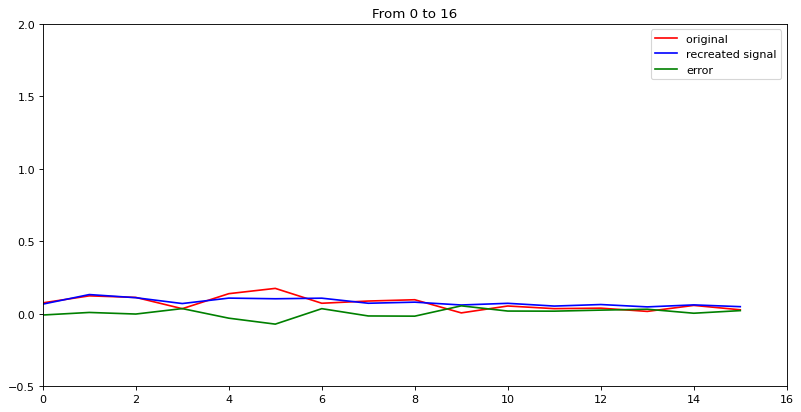

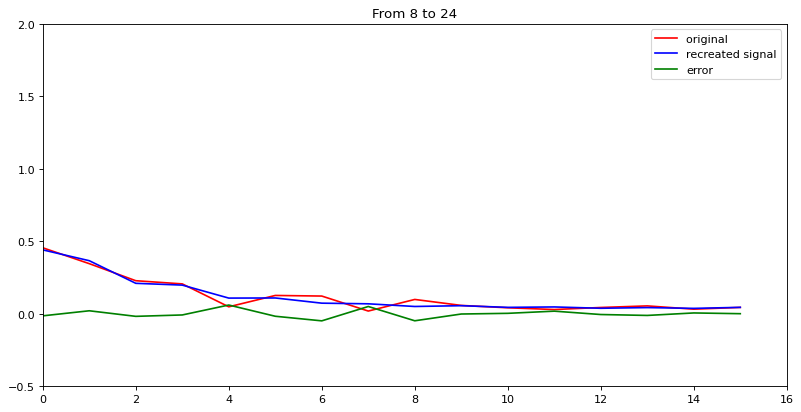

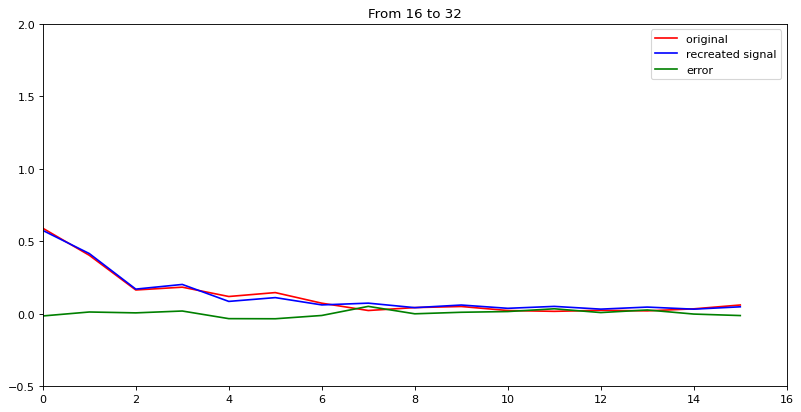

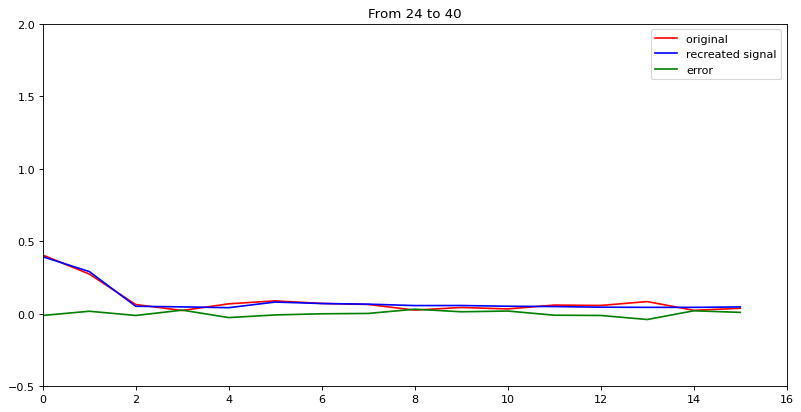

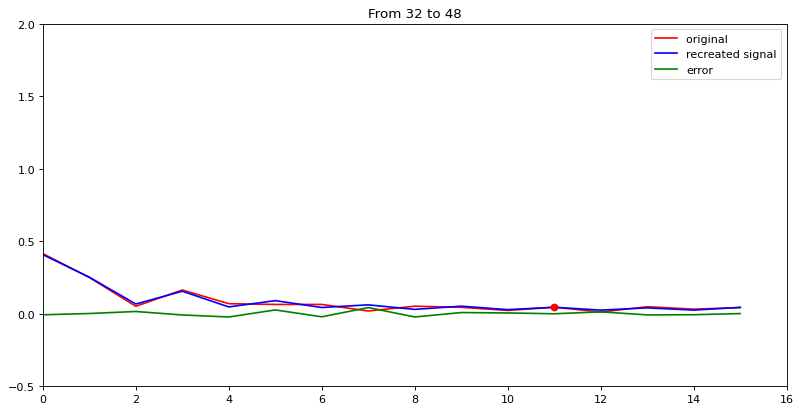

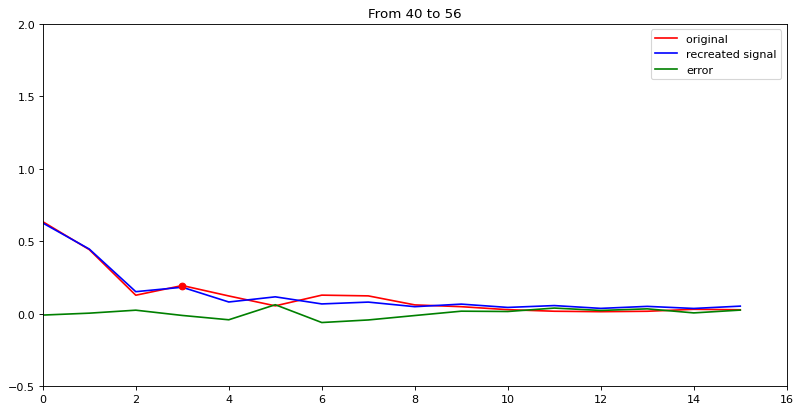

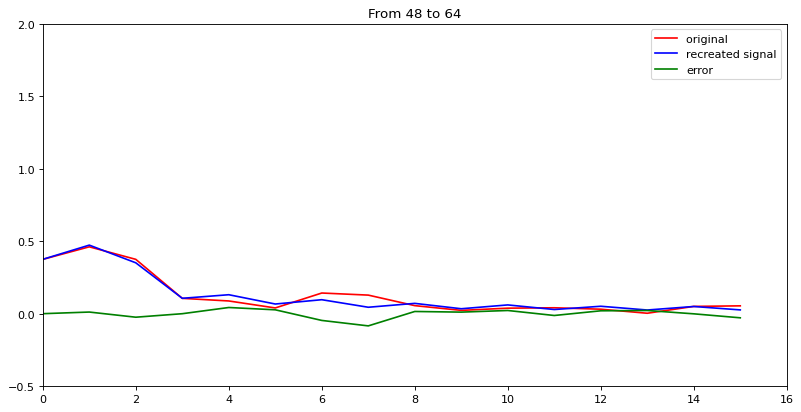

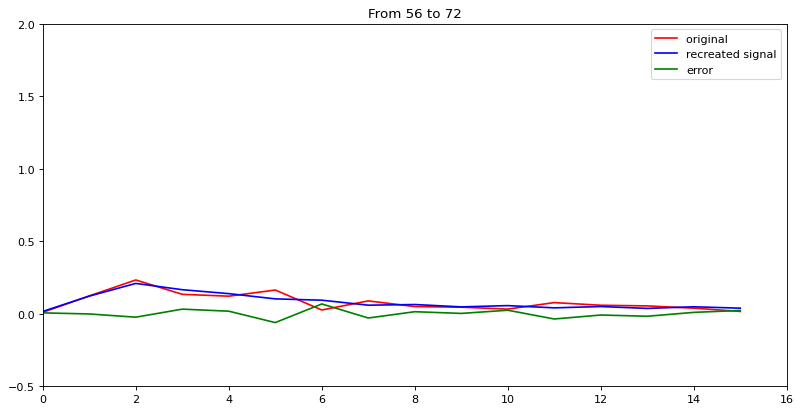

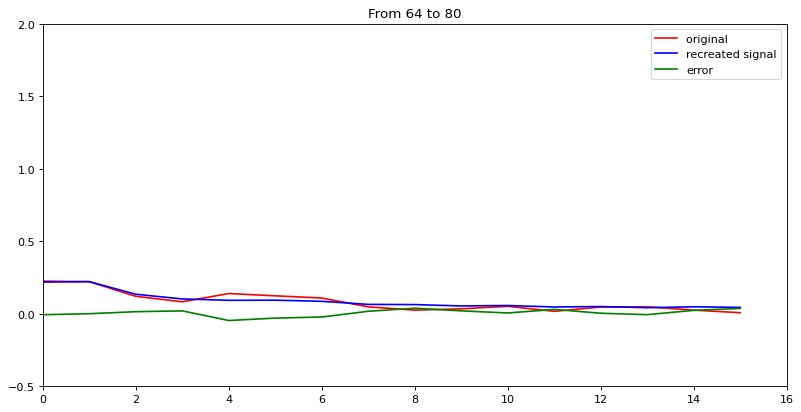

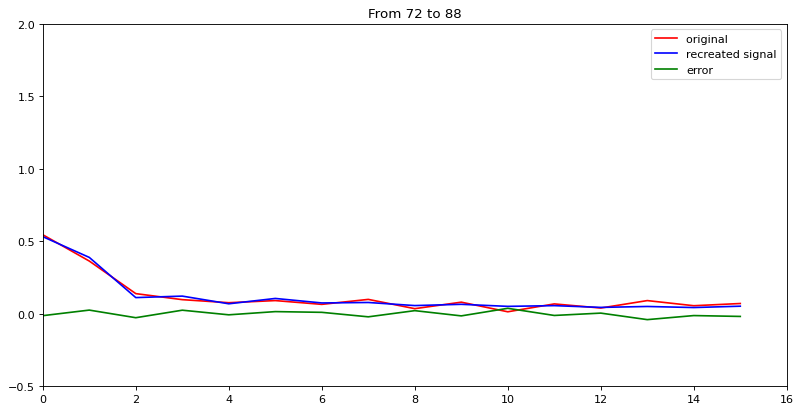

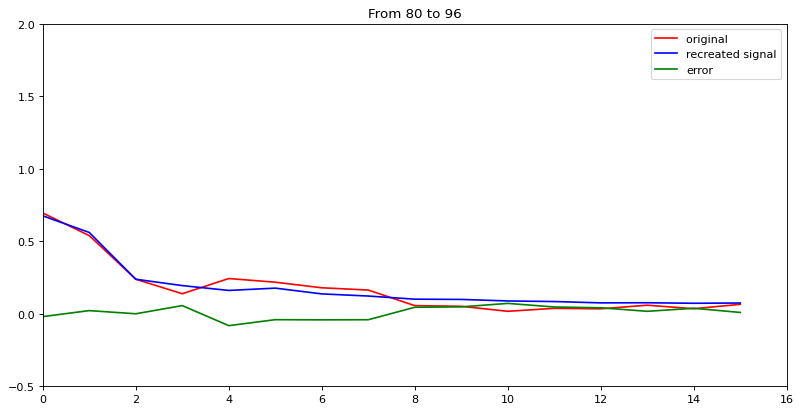

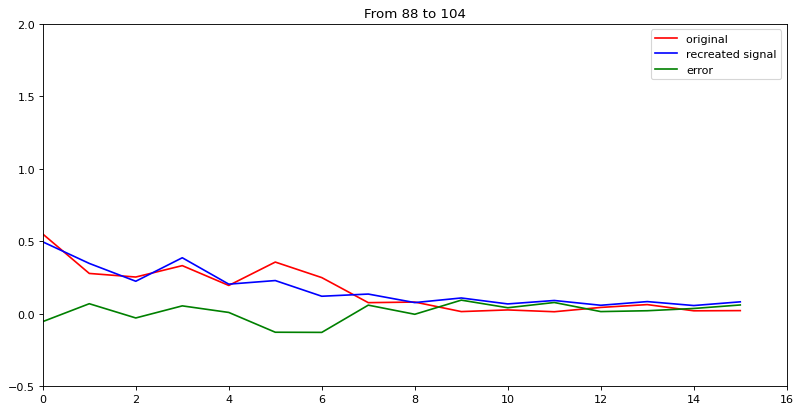

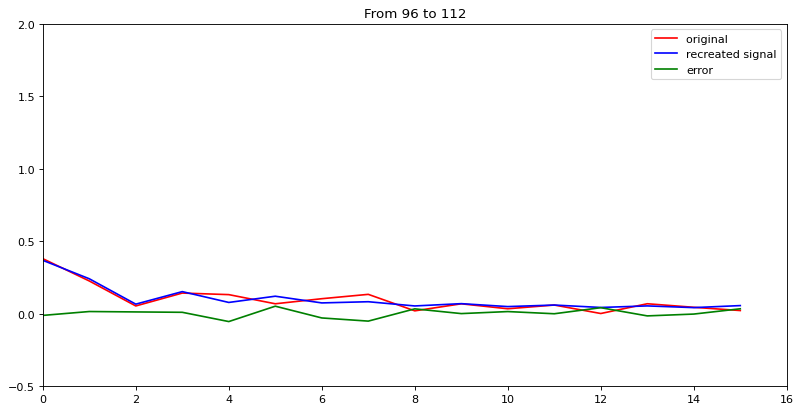

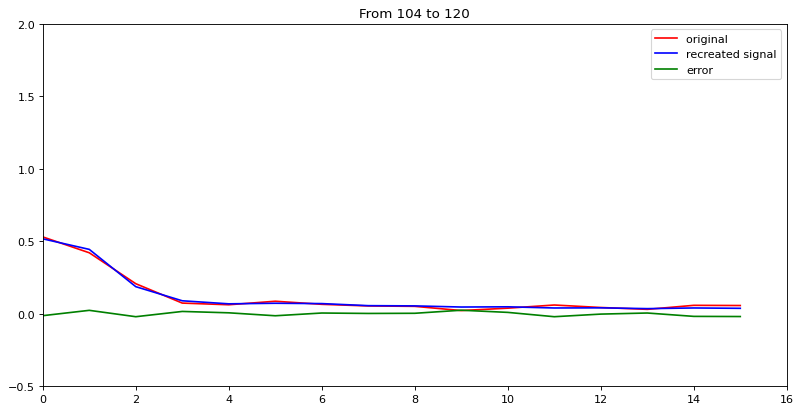

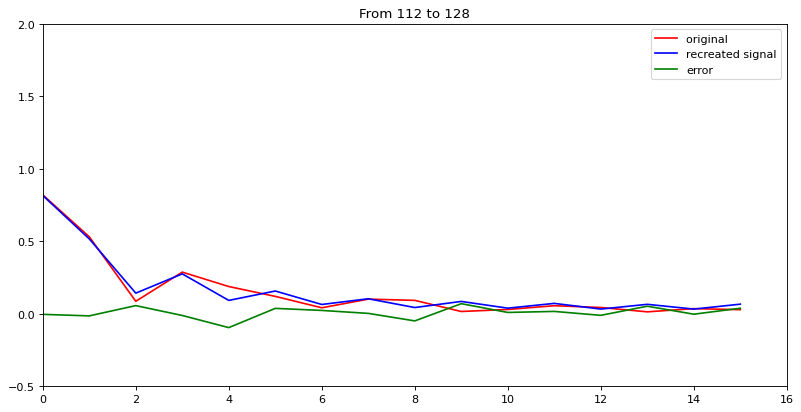

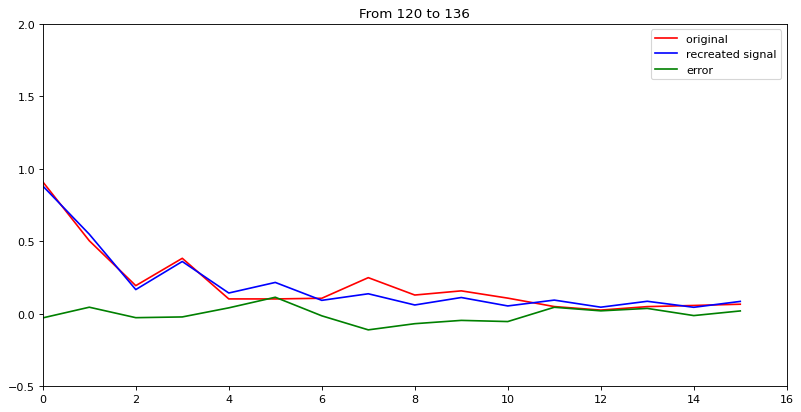

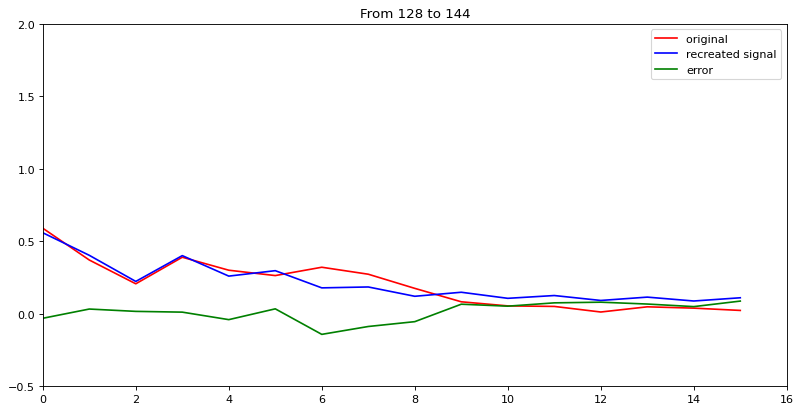

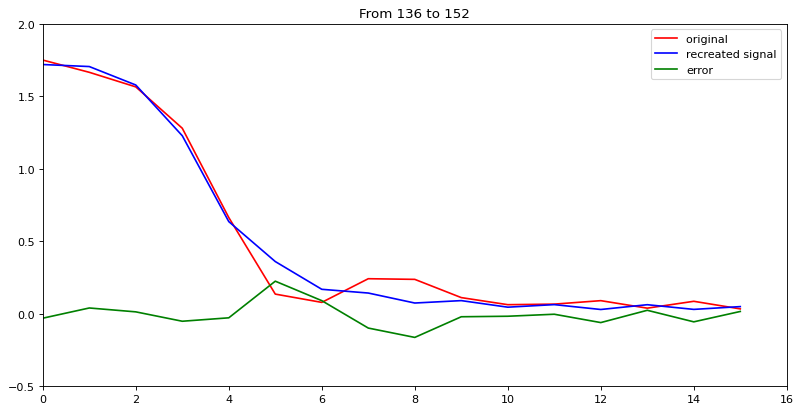

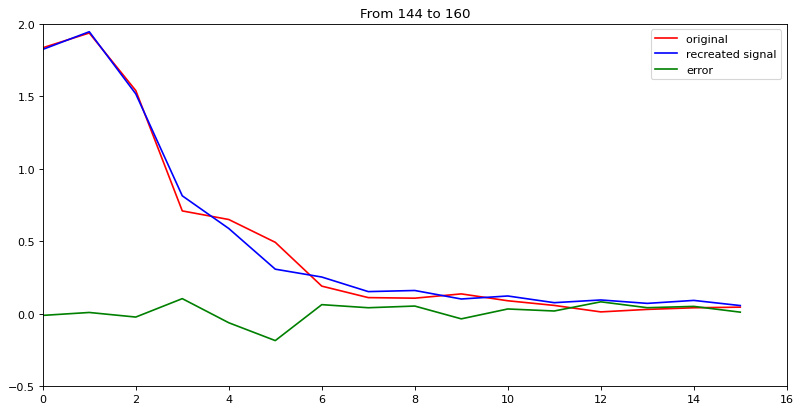

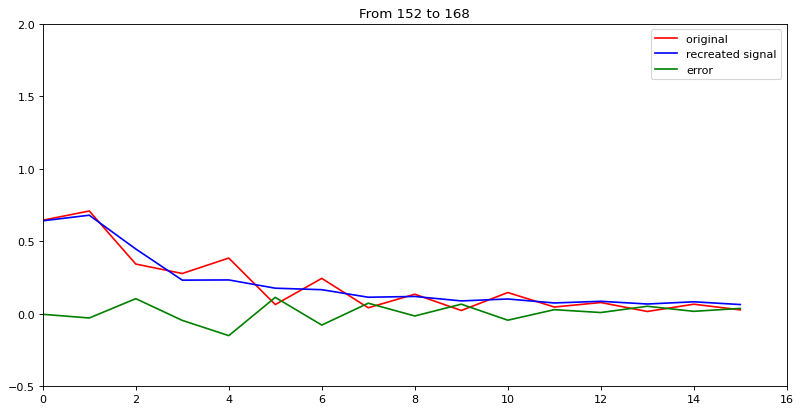

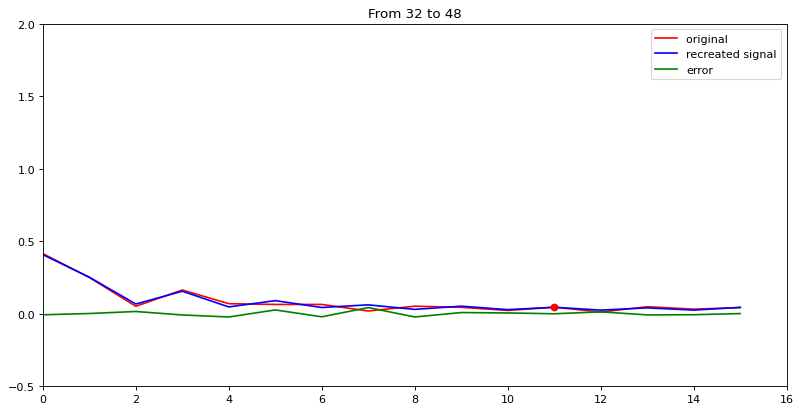

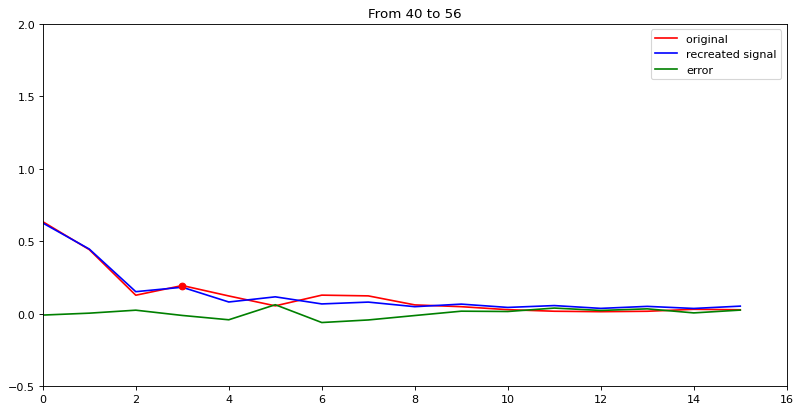

In [47]:
record_number = '07859'
signal_label = "x1"
ProcessRecords(record_number, signal_label)

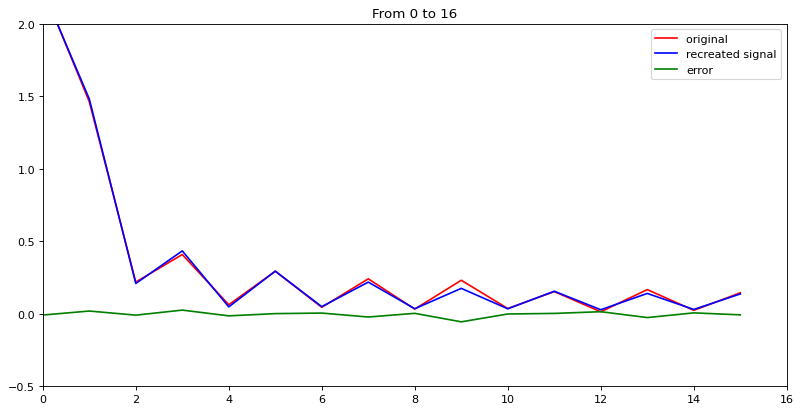

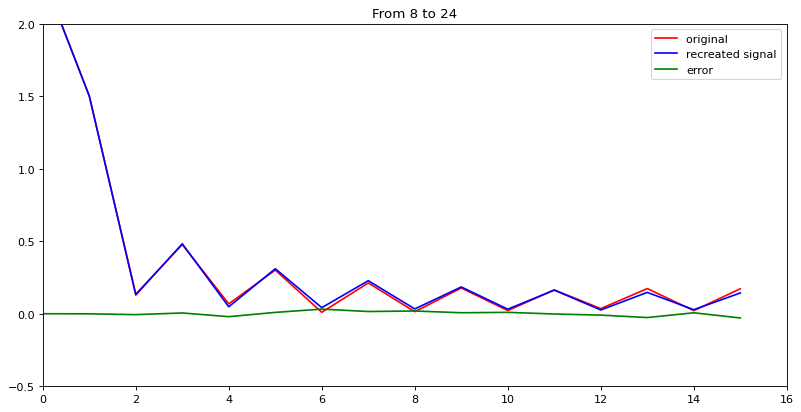

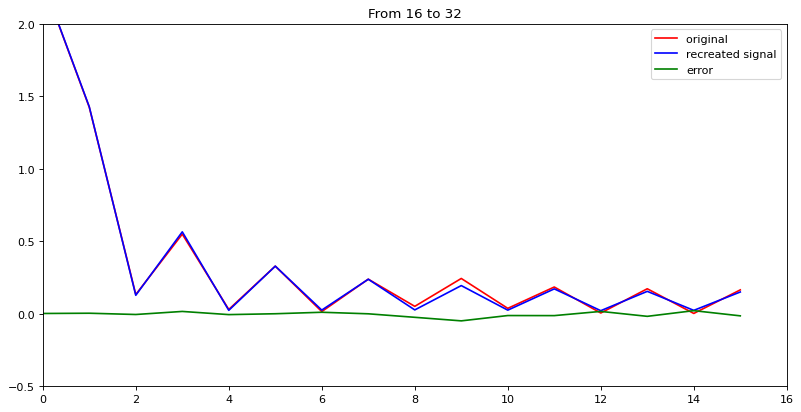

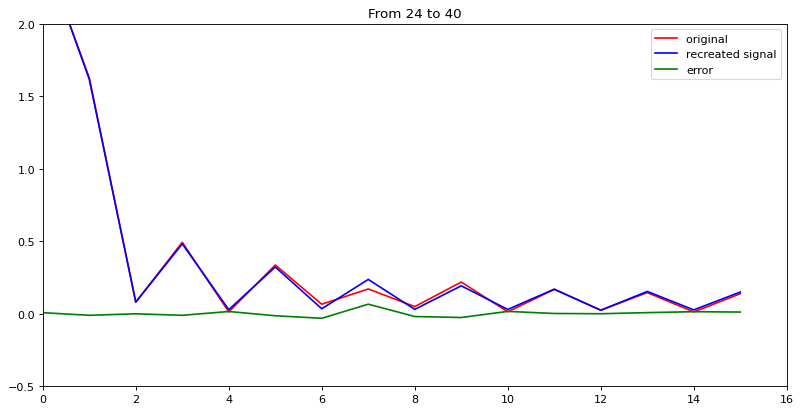

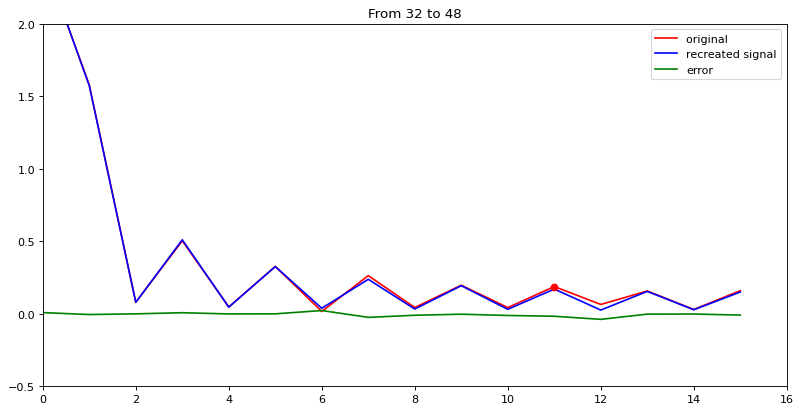

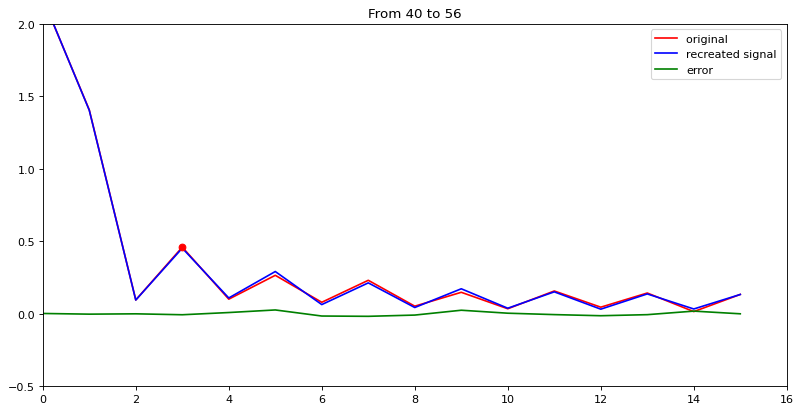

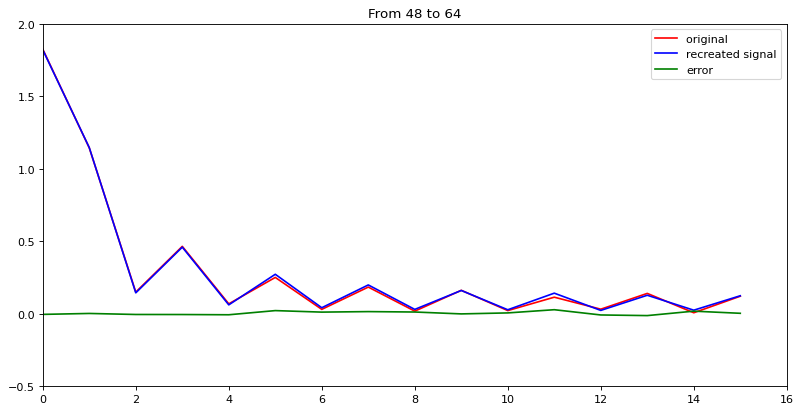

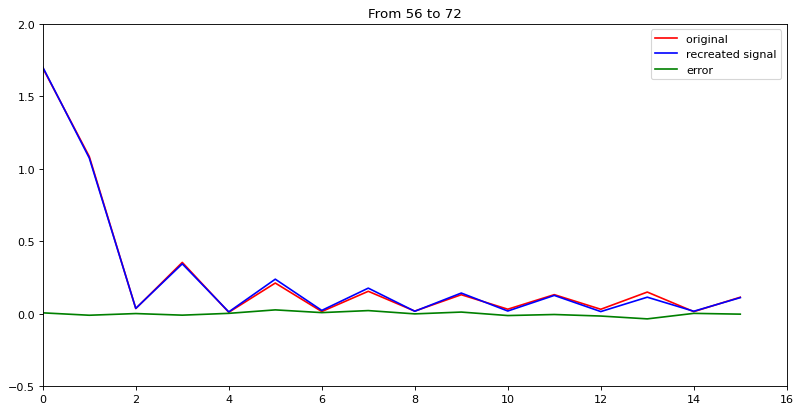

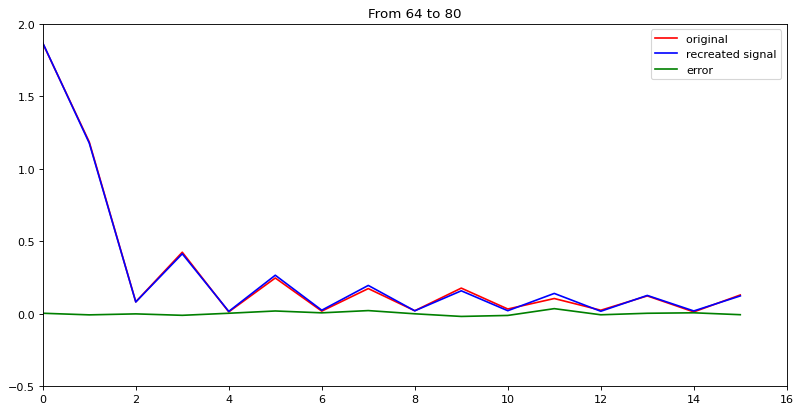

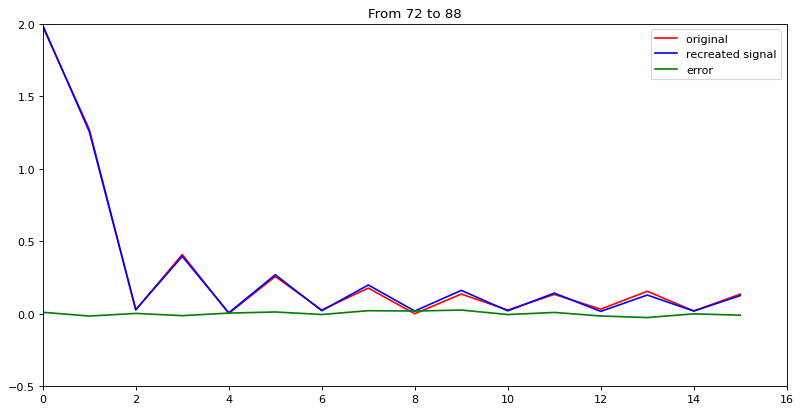

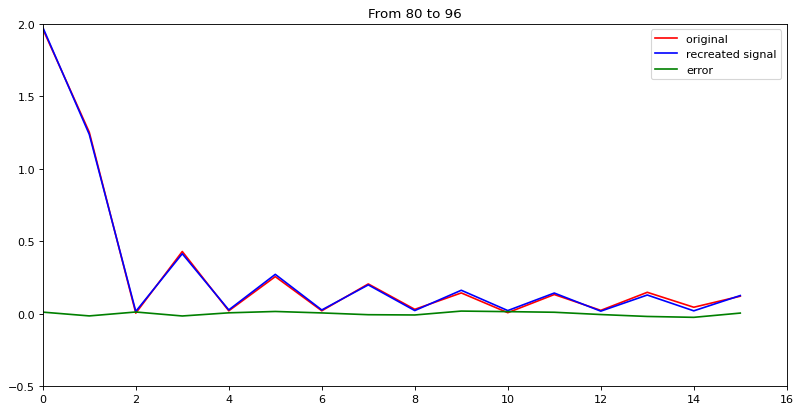

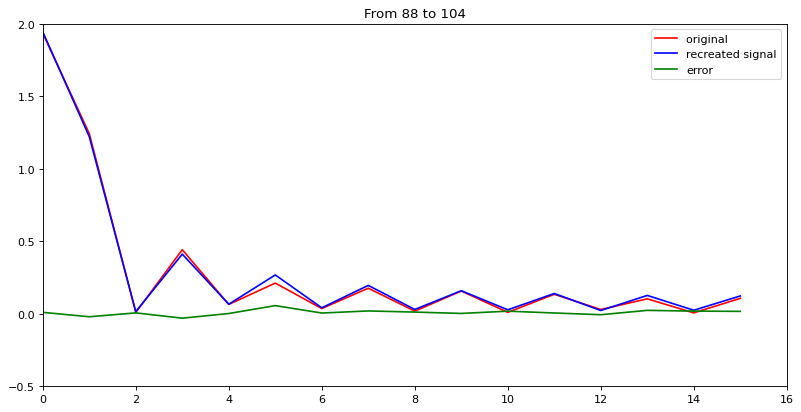

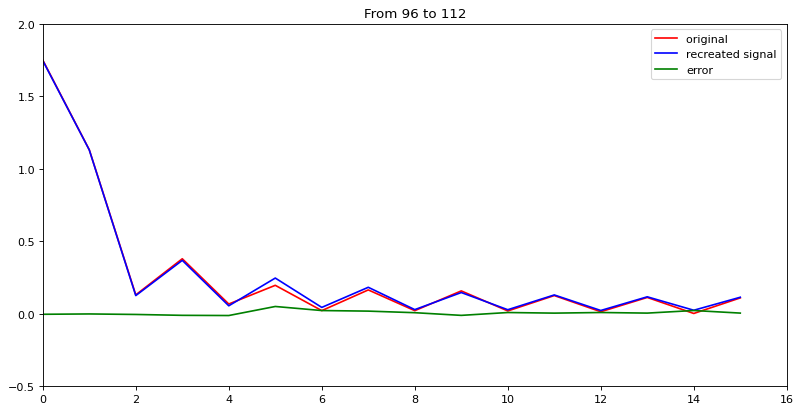

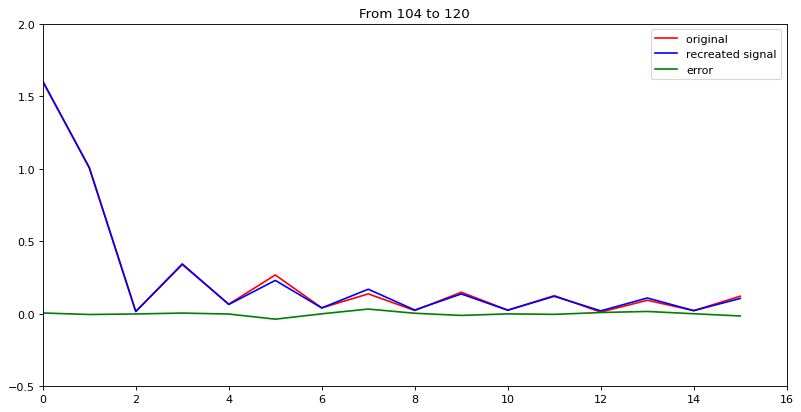

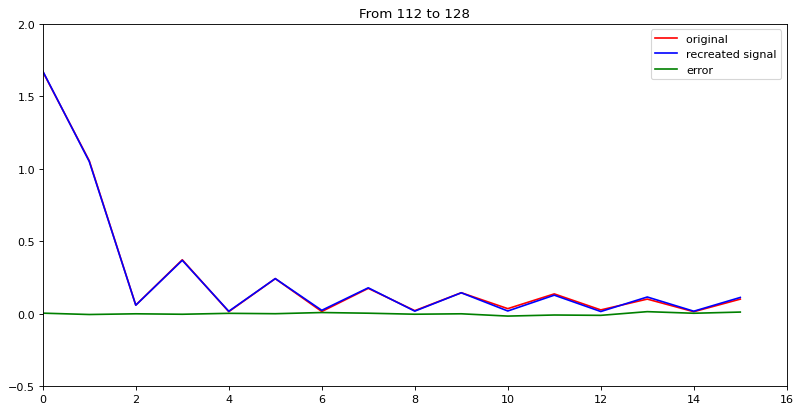

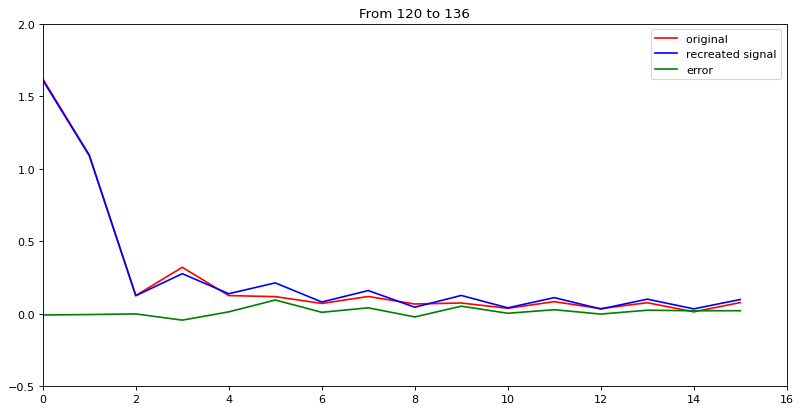

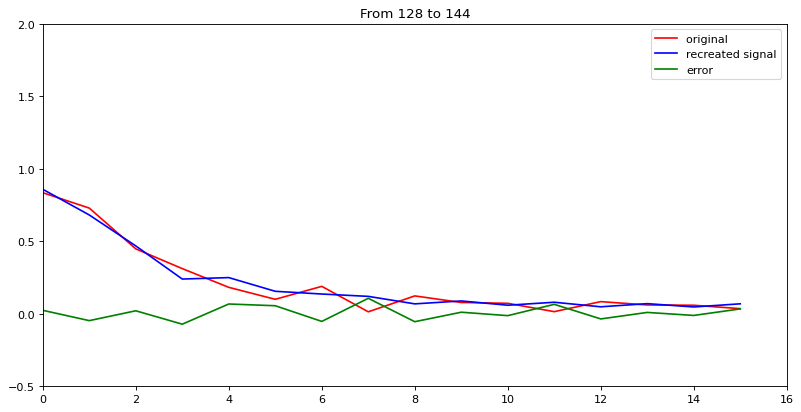

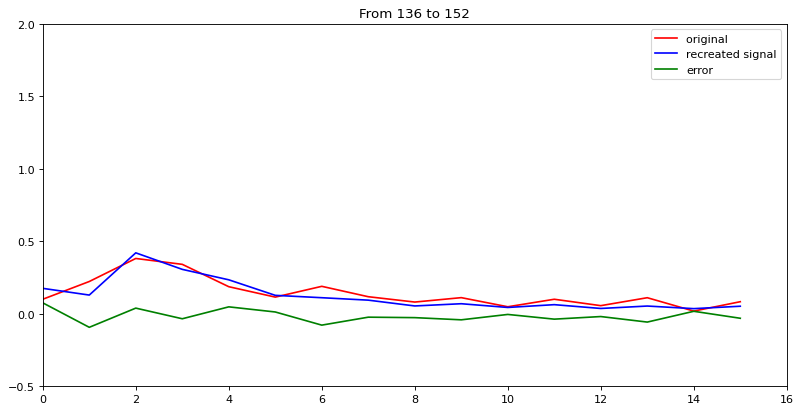

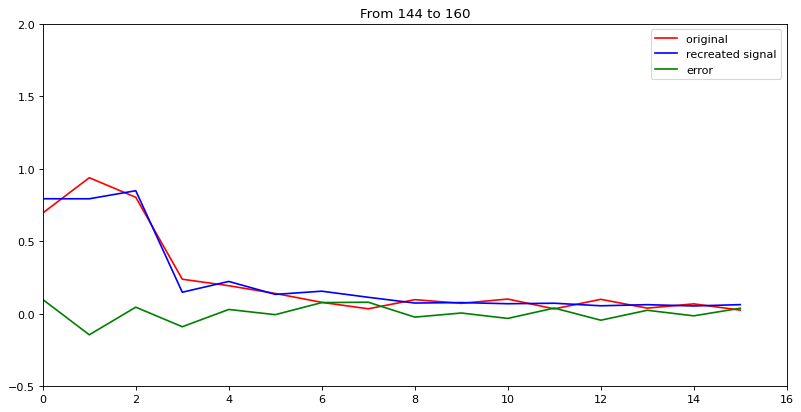

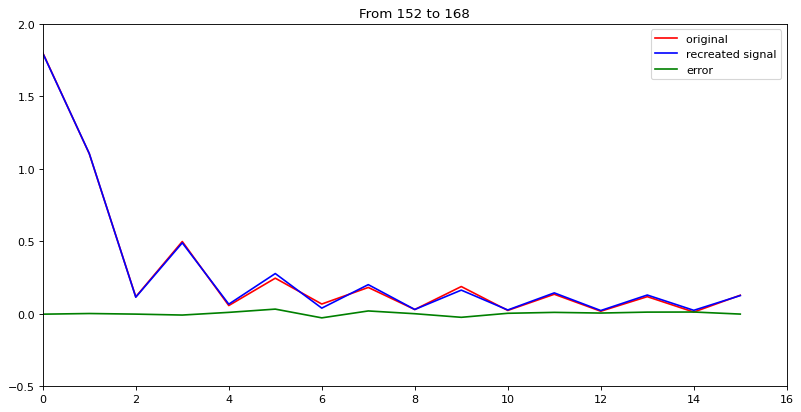

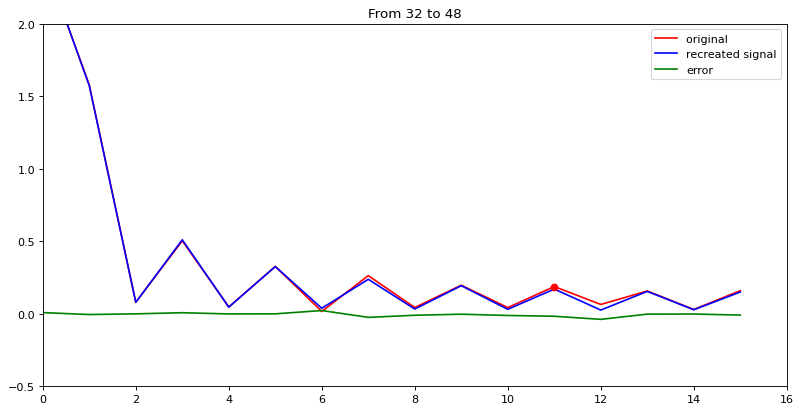

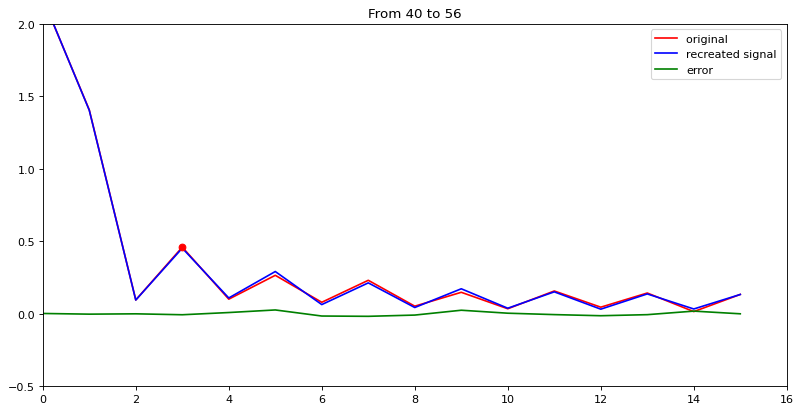

In [48]:
record_number = '07859'
signal_label = "x2"
ProcessRecords(record_number, signal_label)

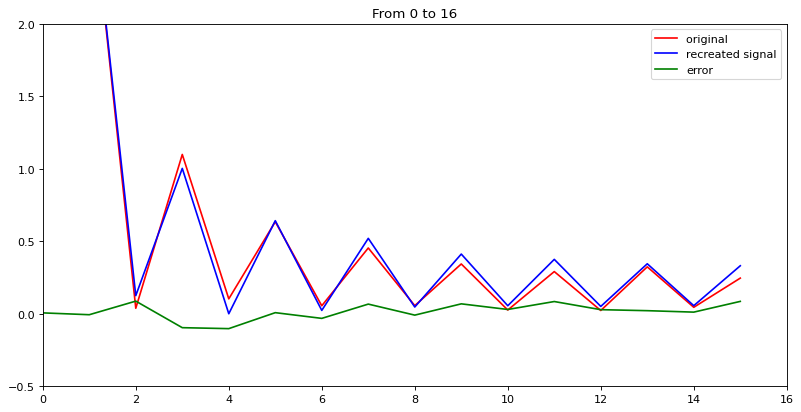

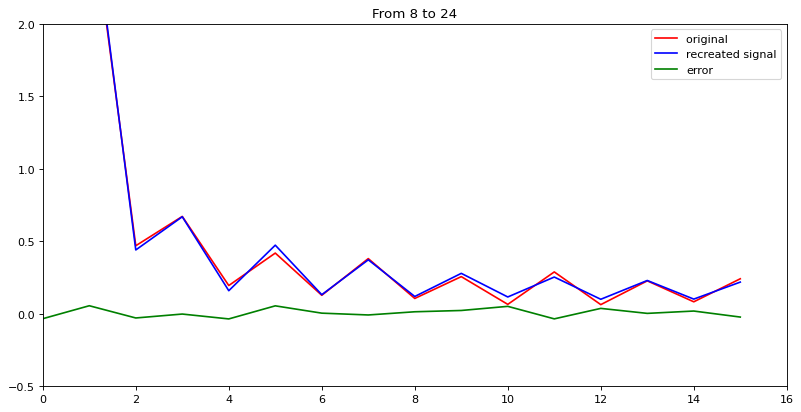

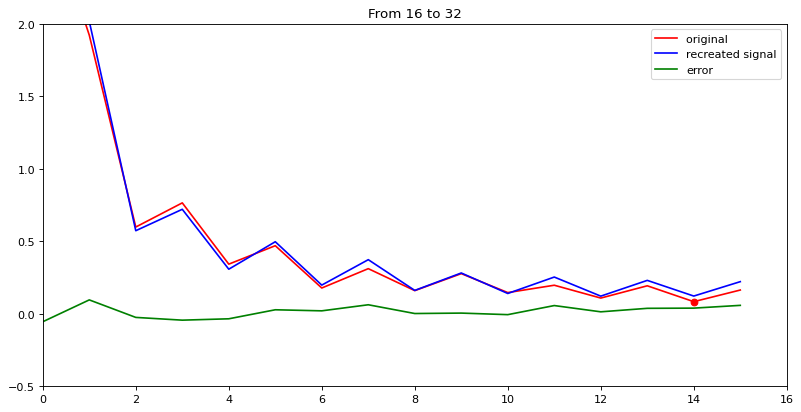

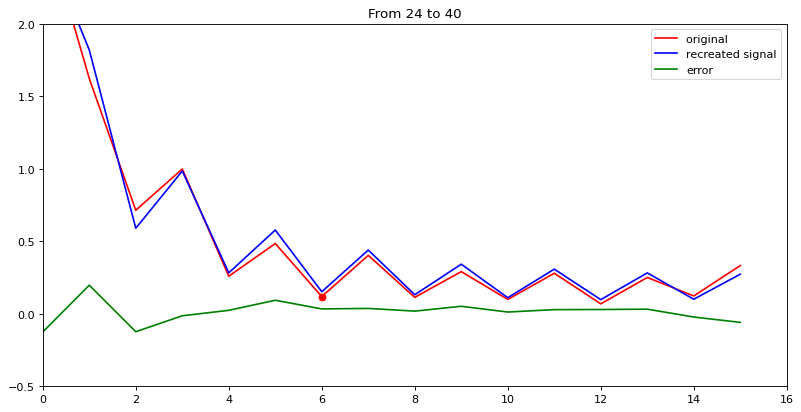

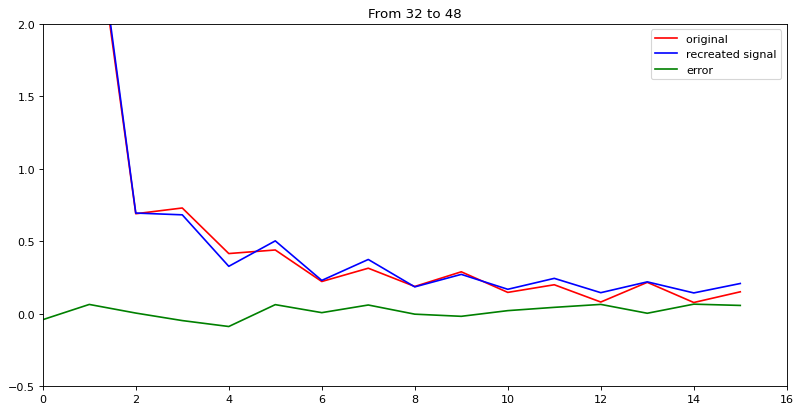

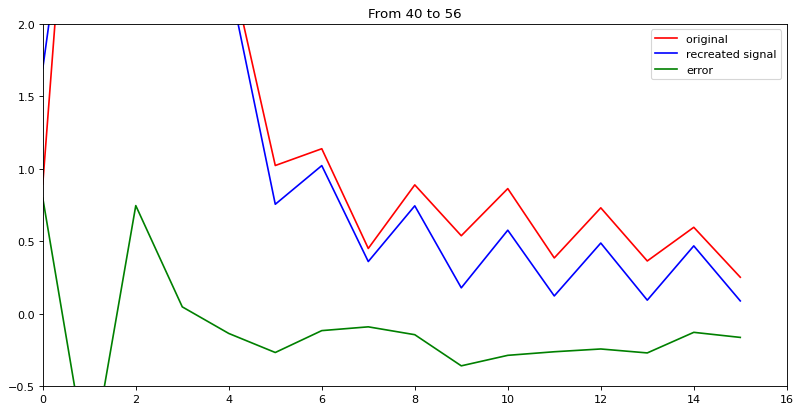

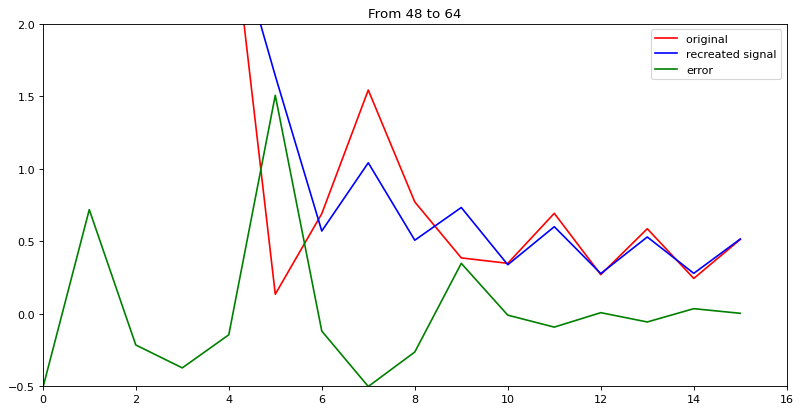

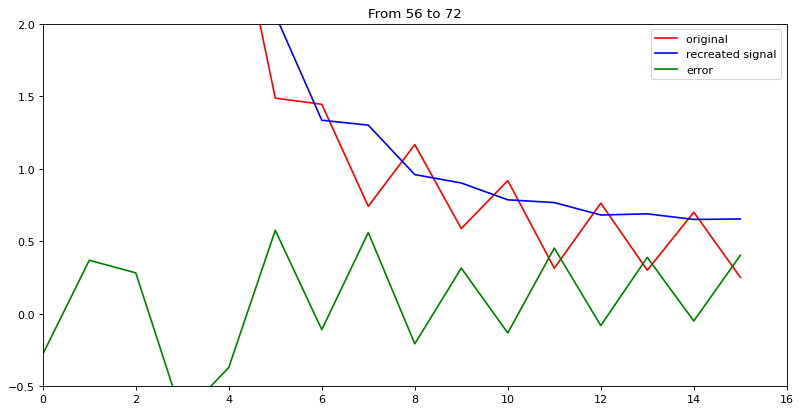

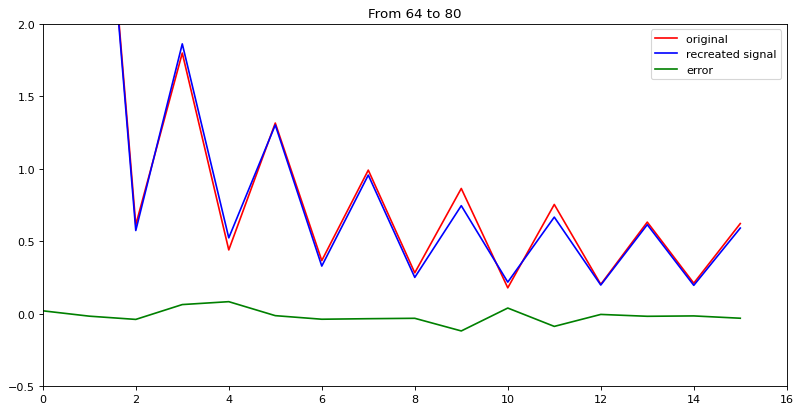

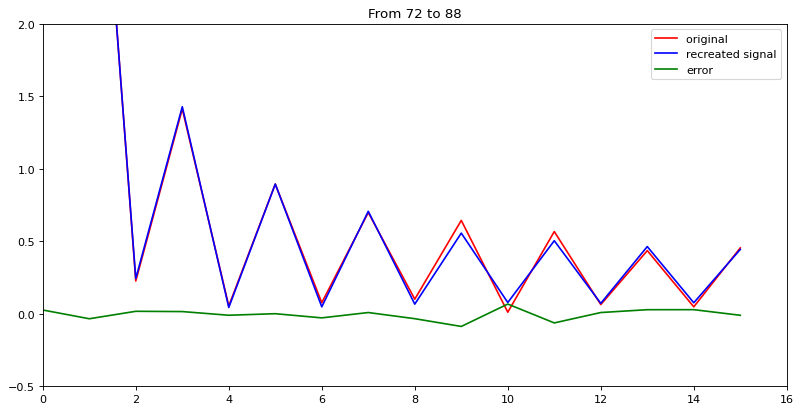

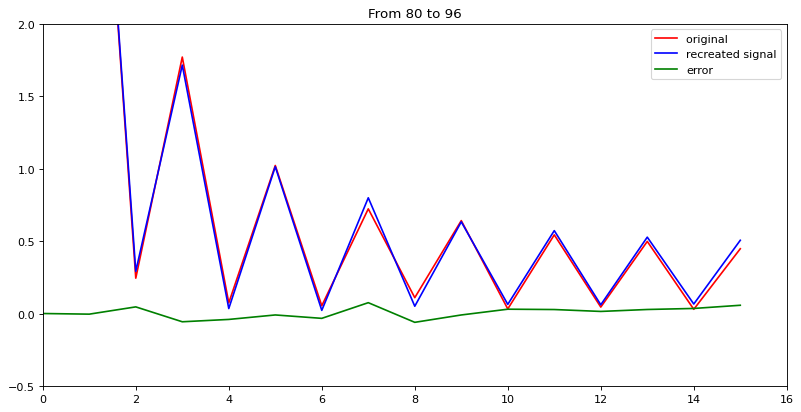

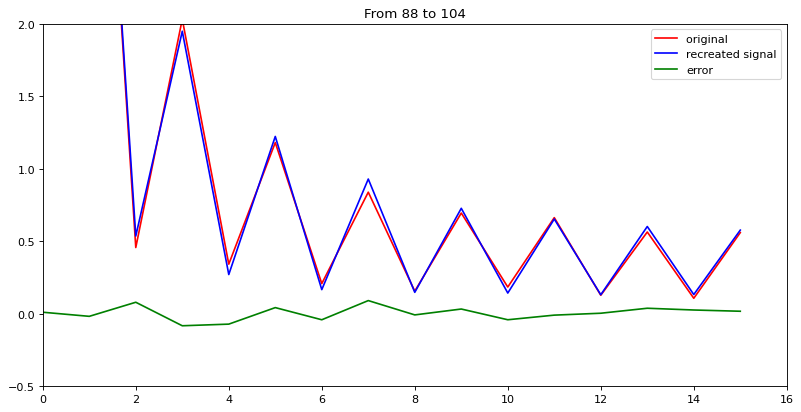

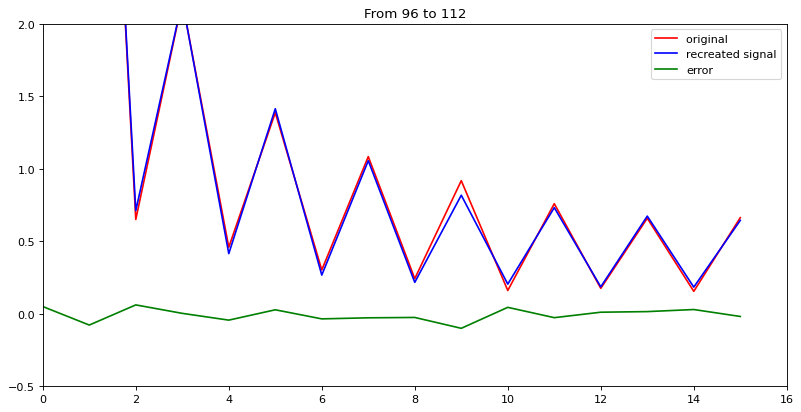

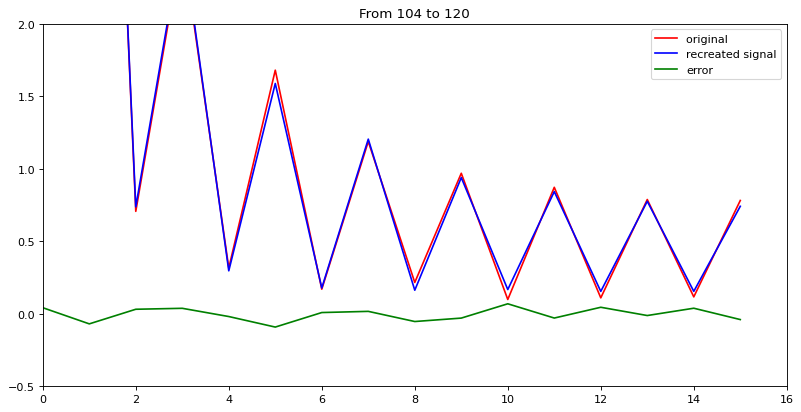

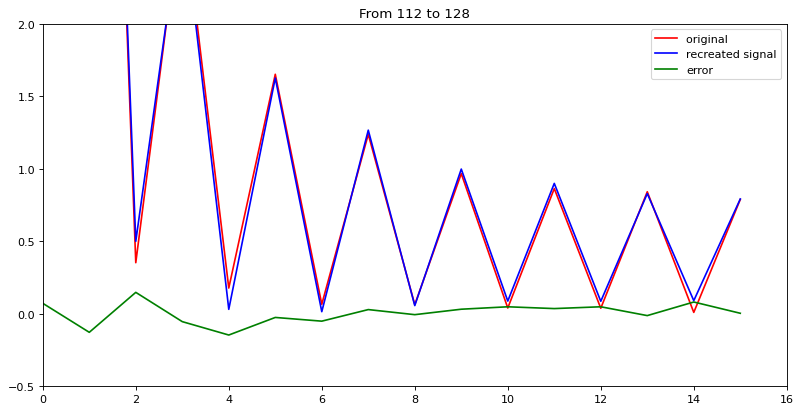

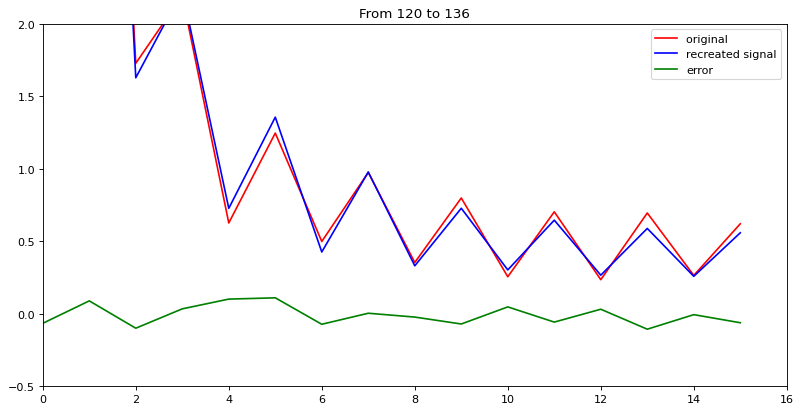

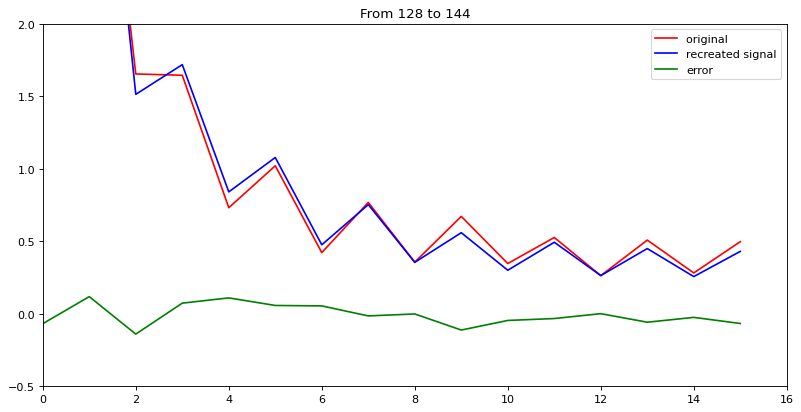

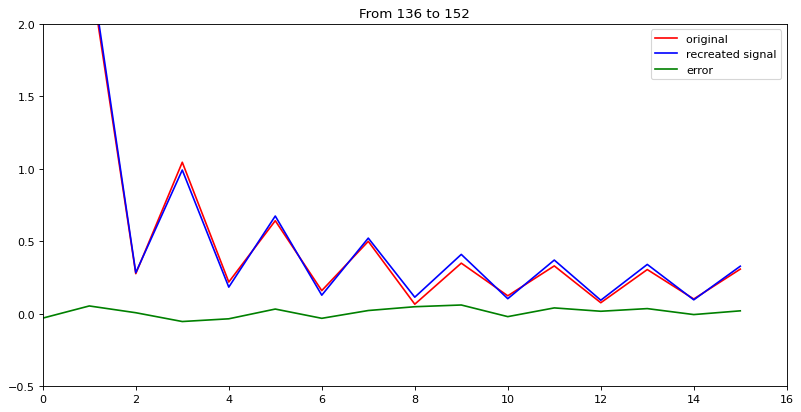

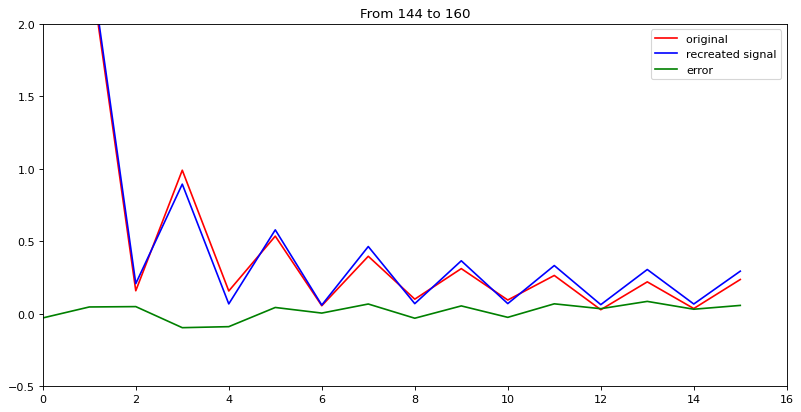

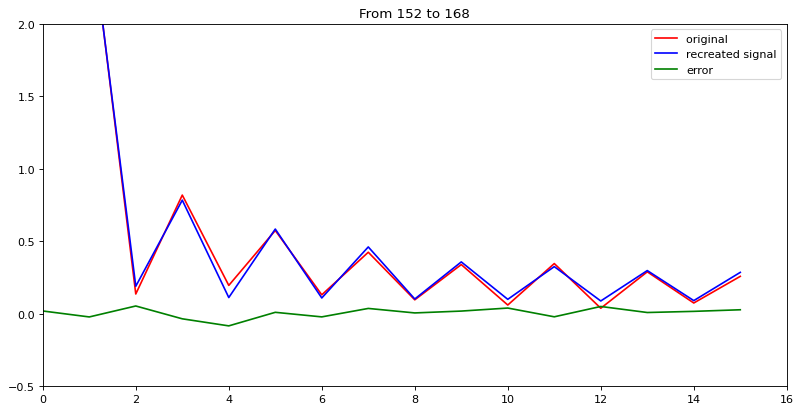

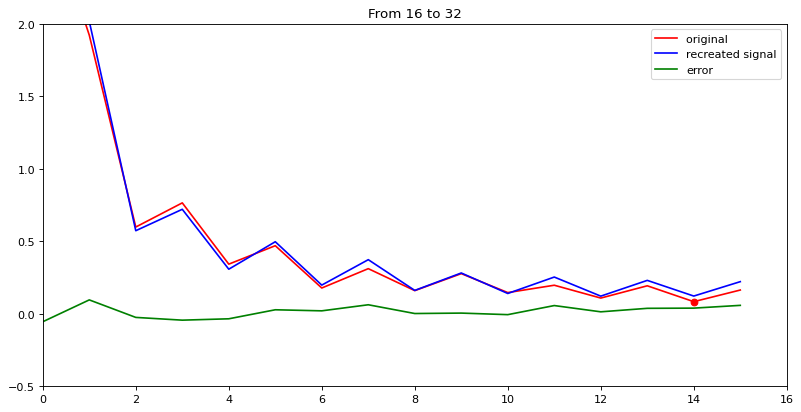

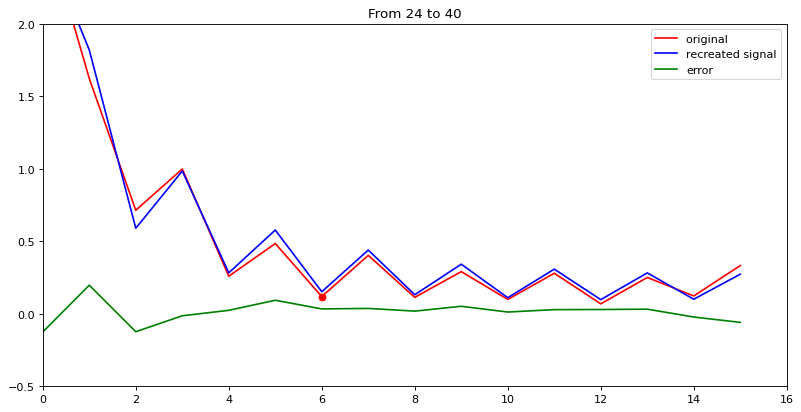

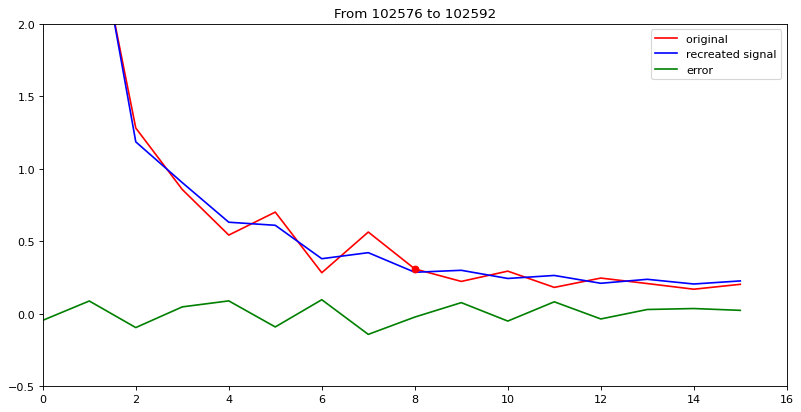

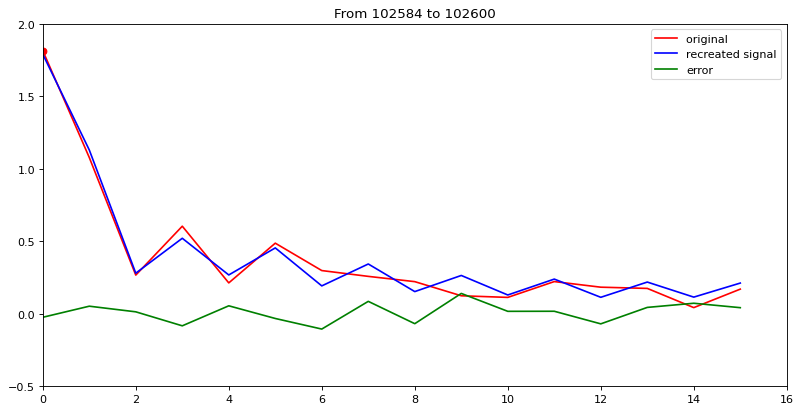

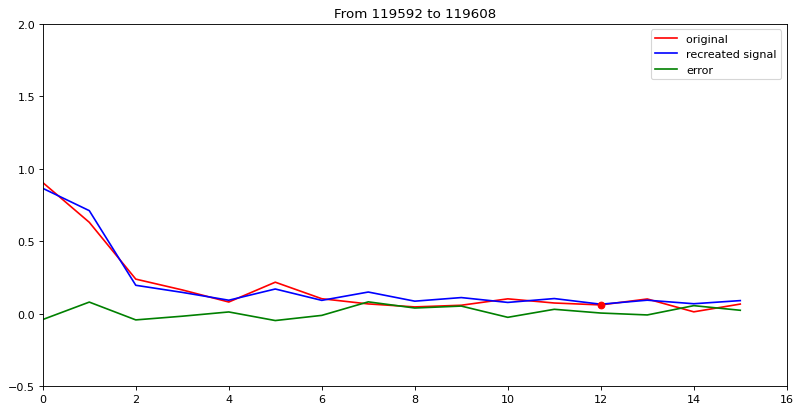

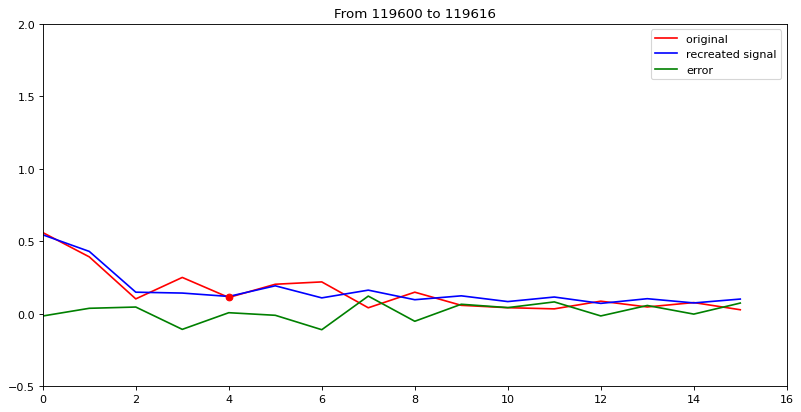

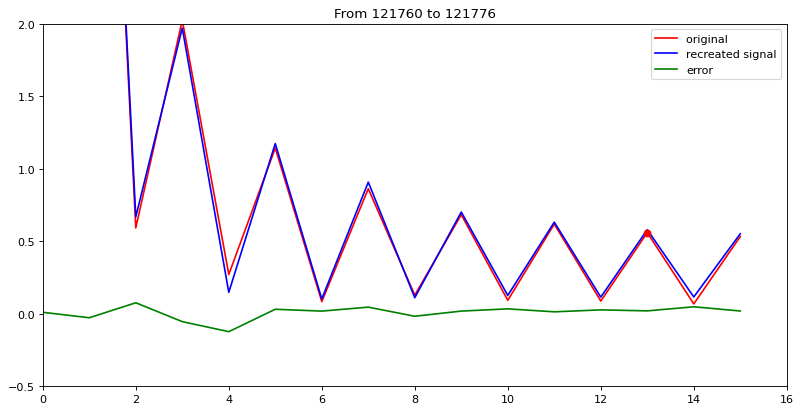

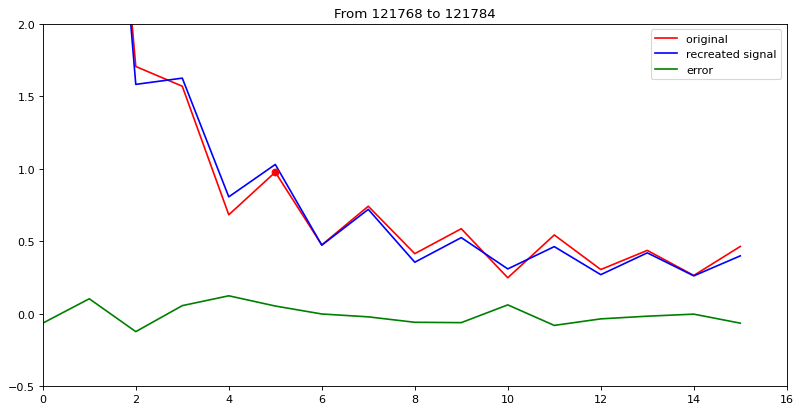

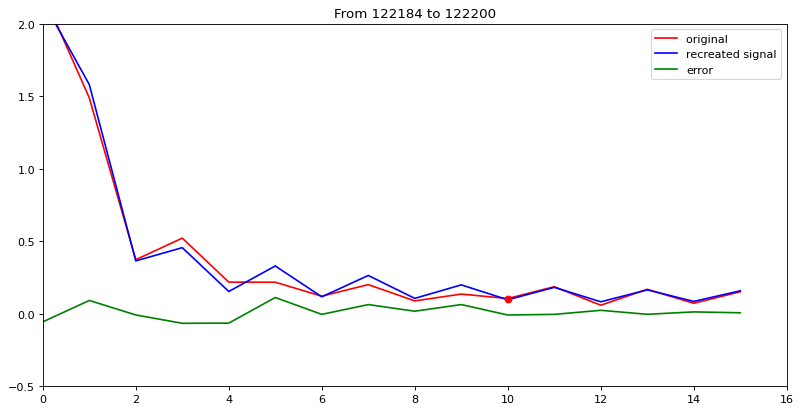

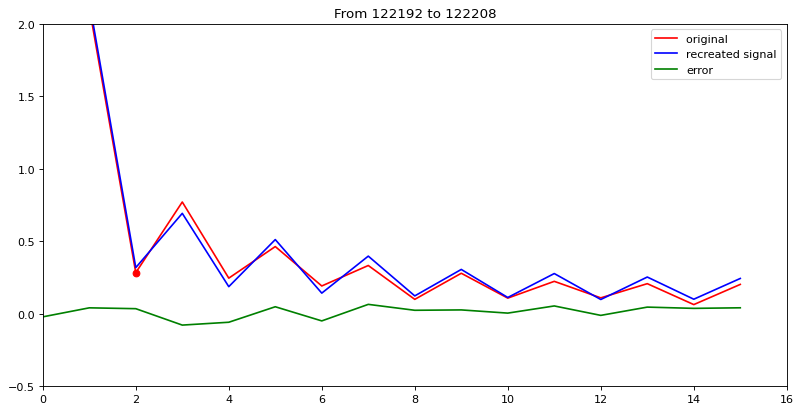

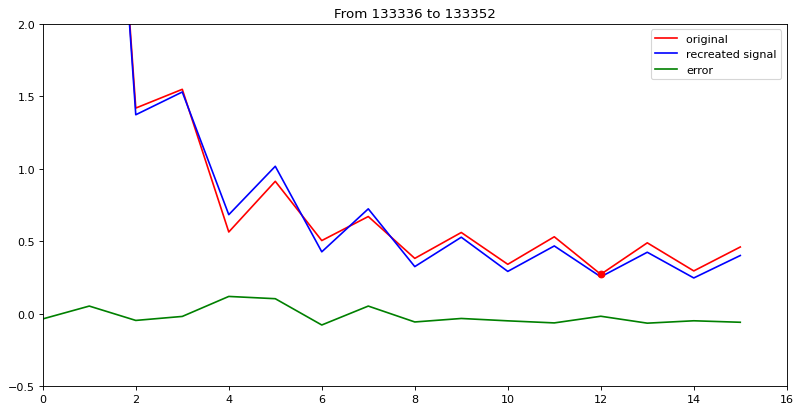

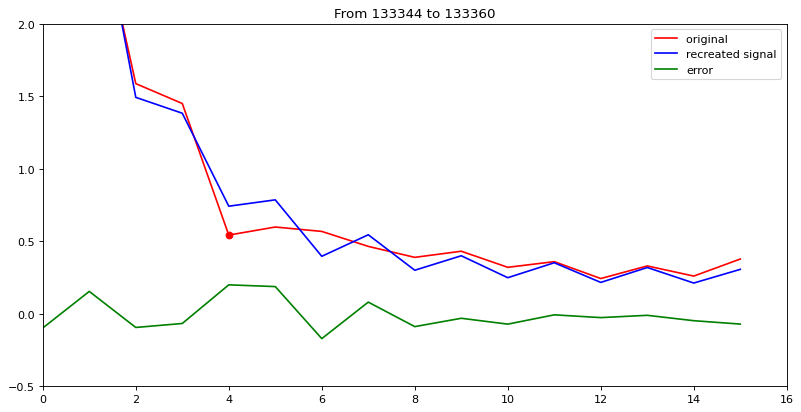

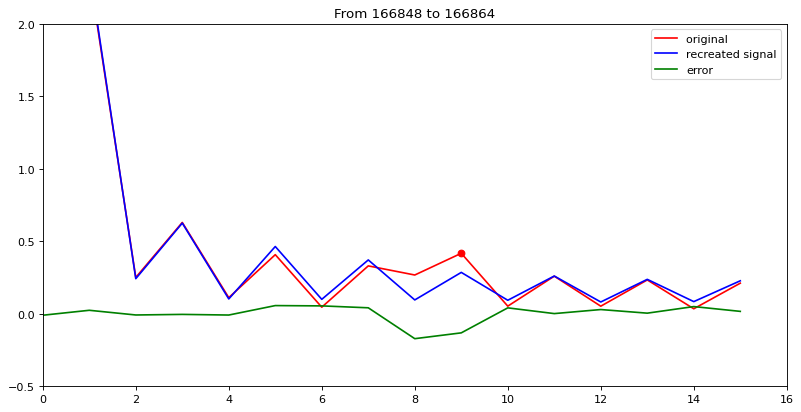

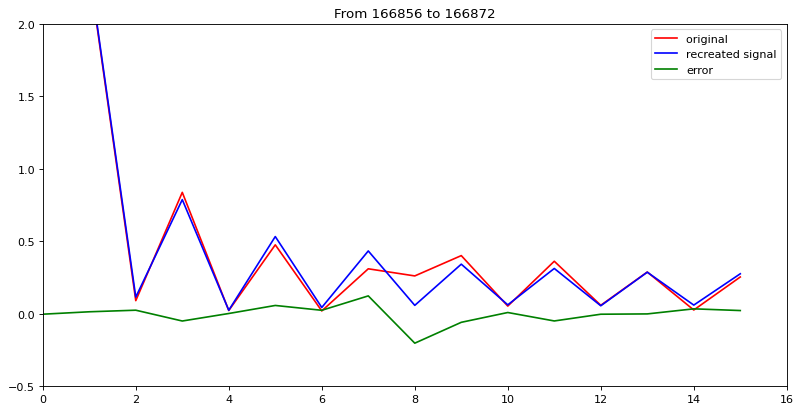

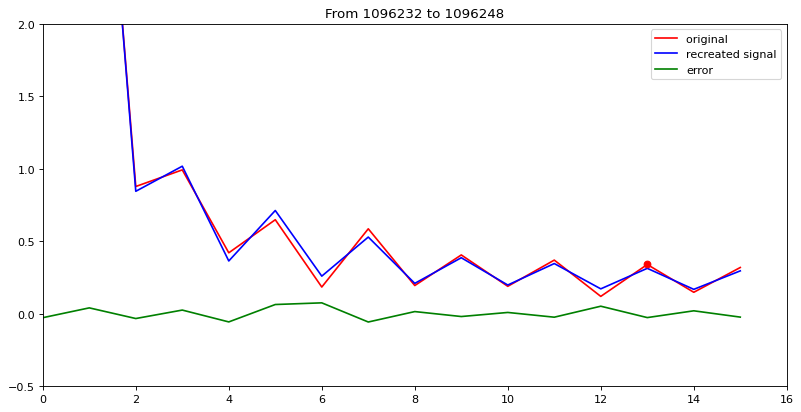

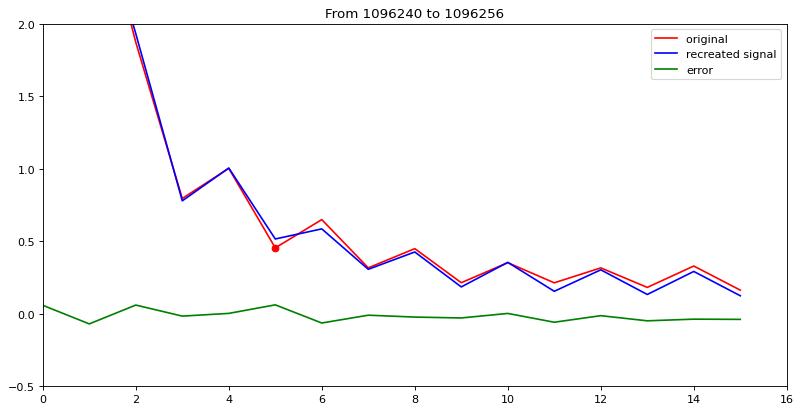

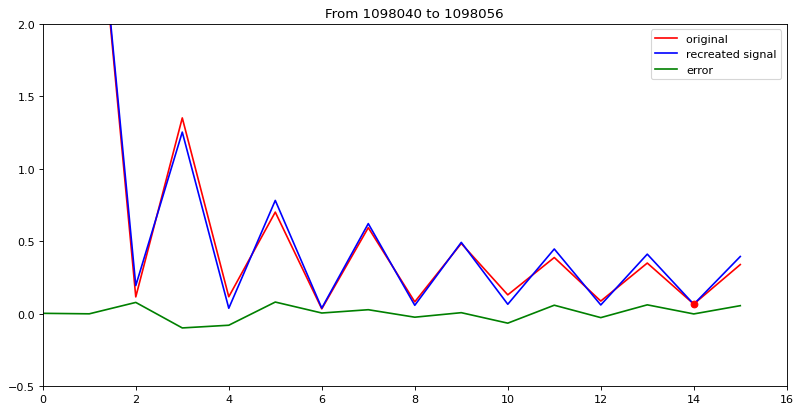

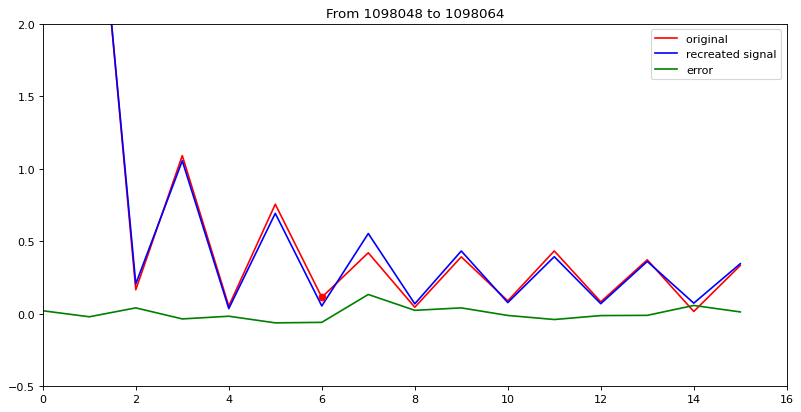

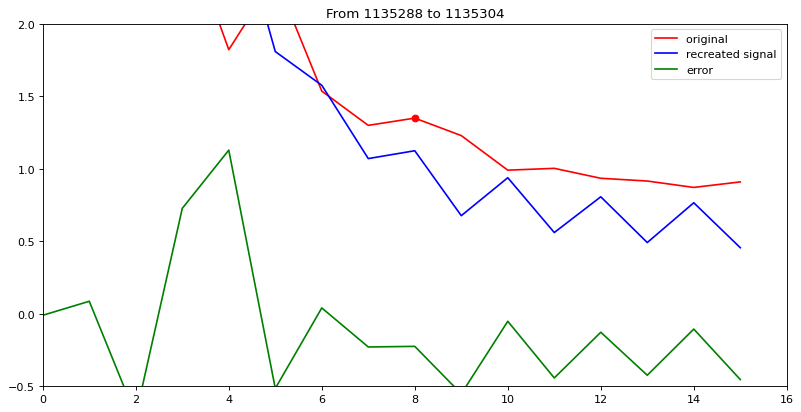

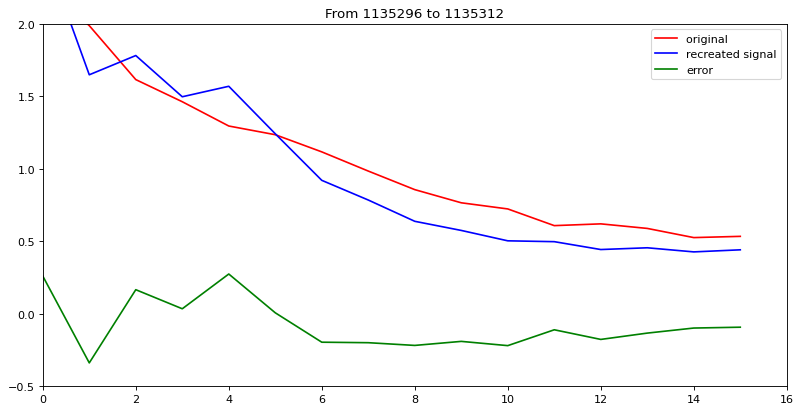

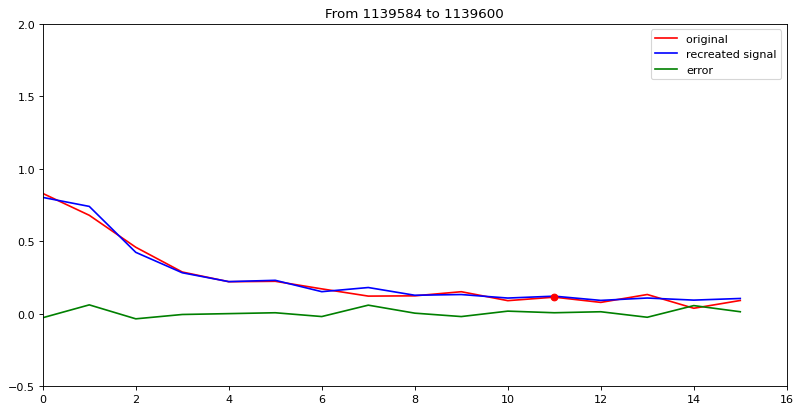

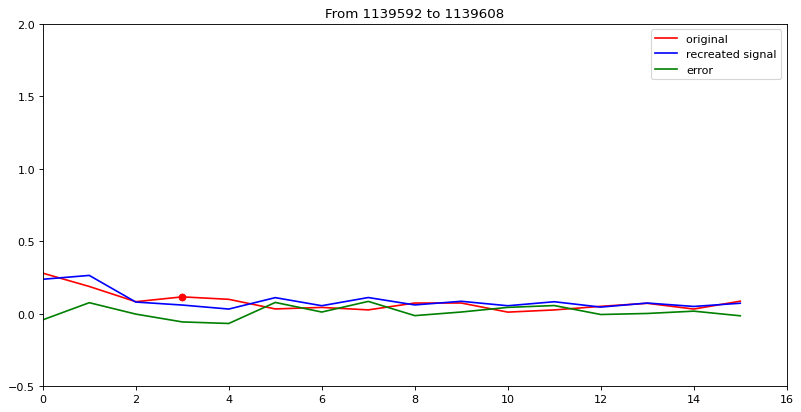

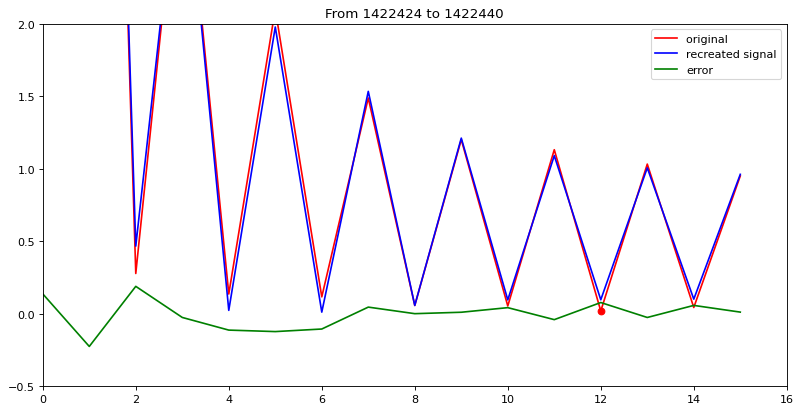

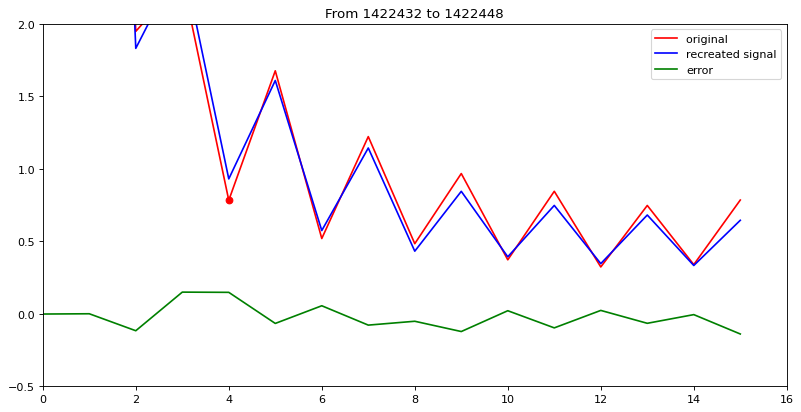

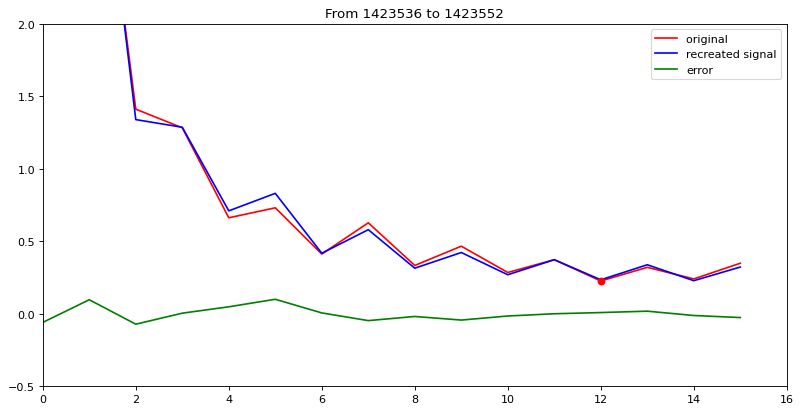

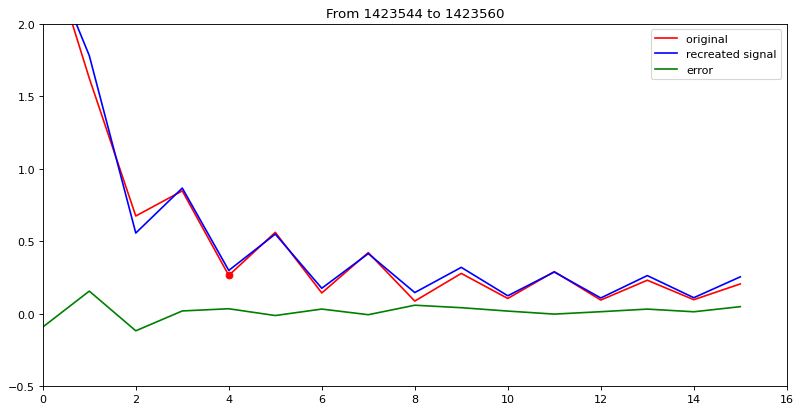

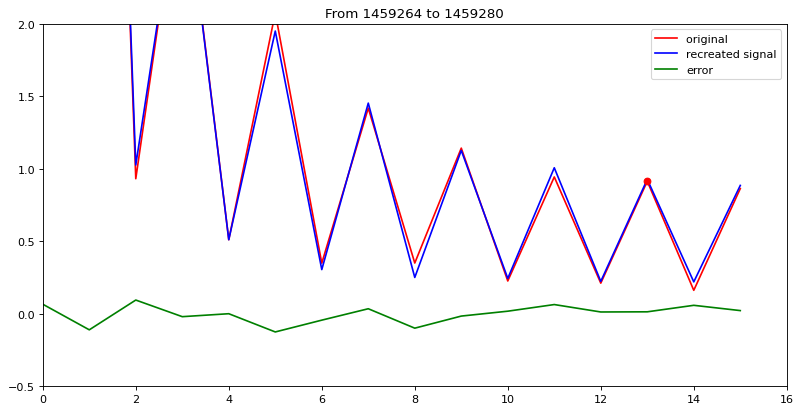

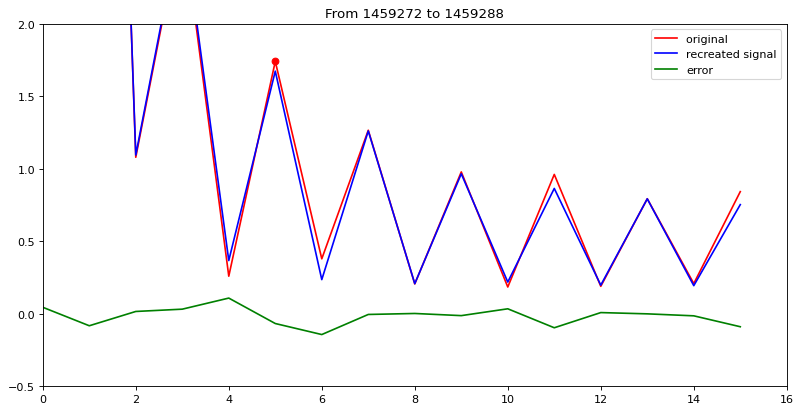

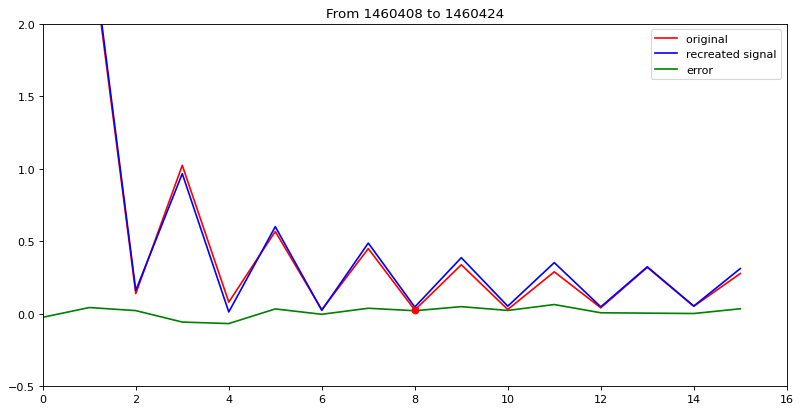

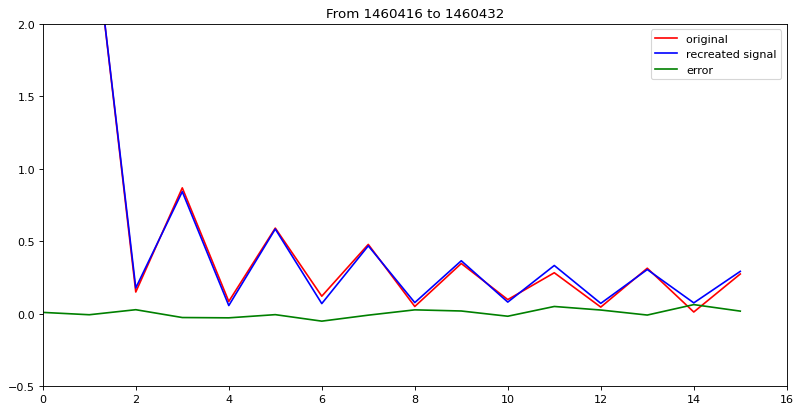

In [49]:
record_number = '04015'
signal_label = "x1"
ProcessRecords(record_number, signal_label)

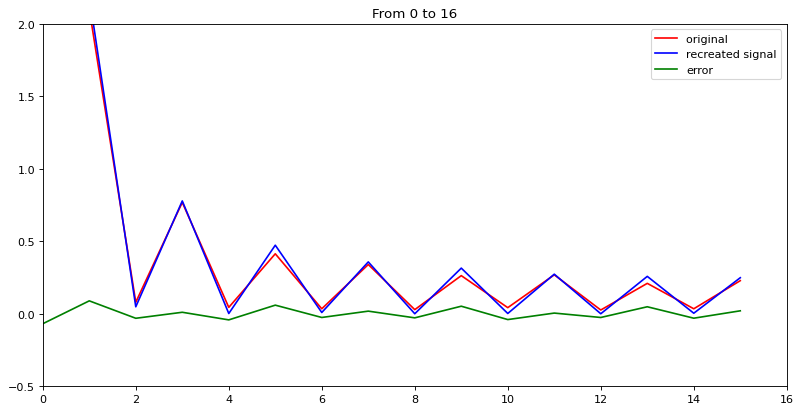

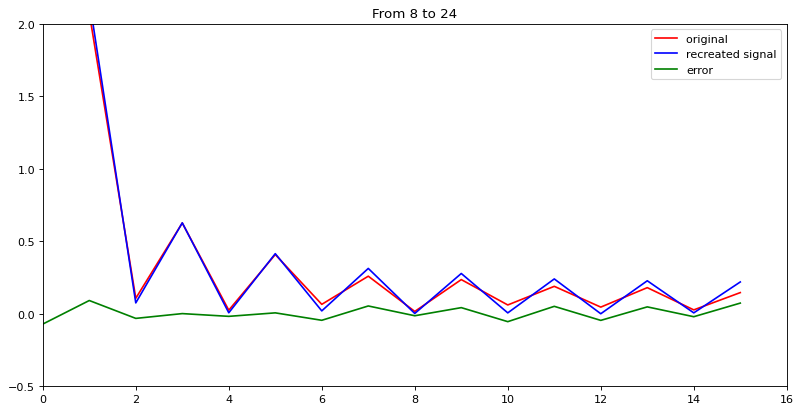

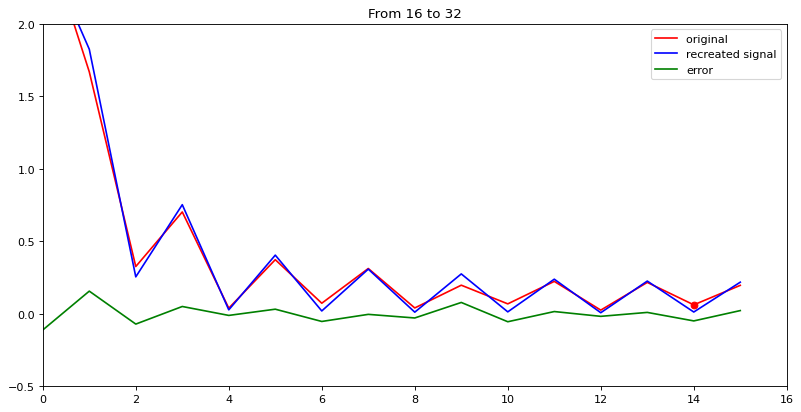

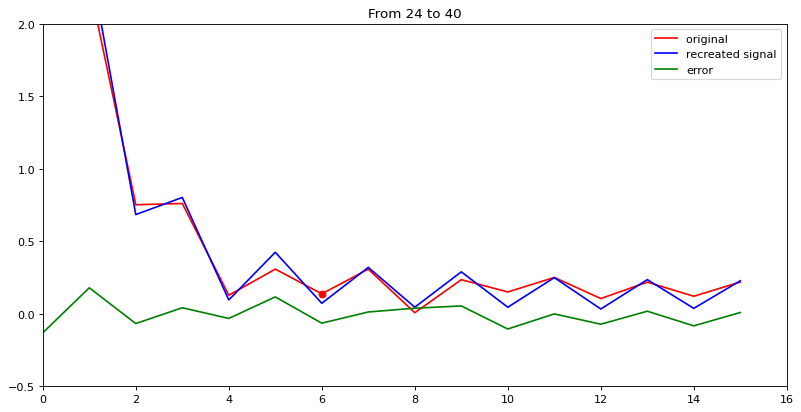

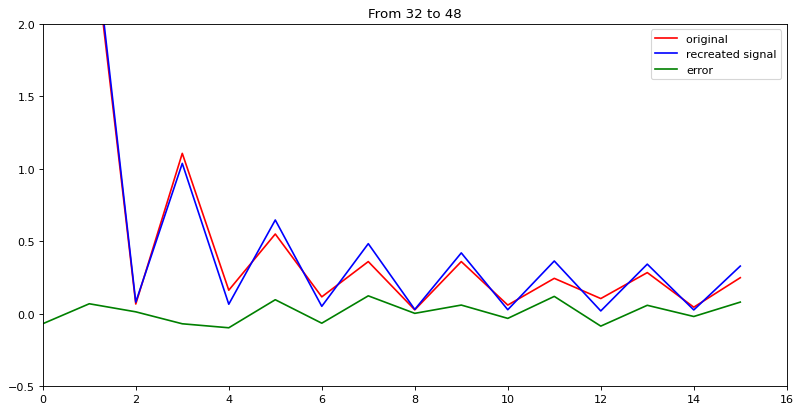

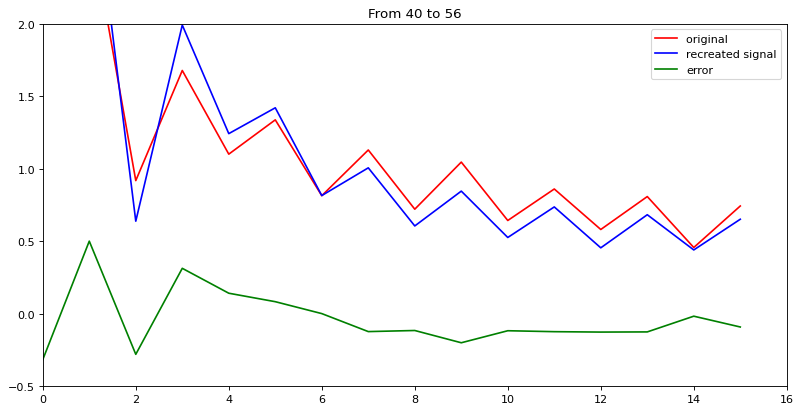

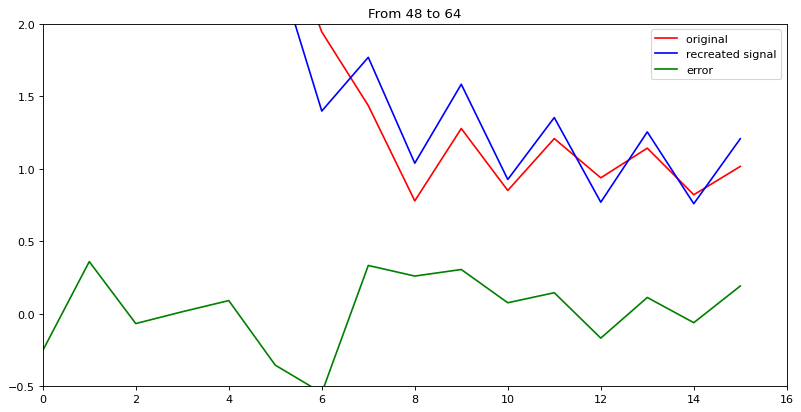

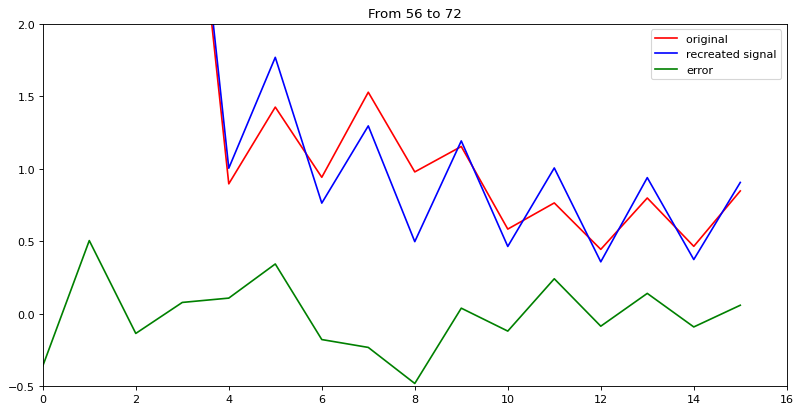

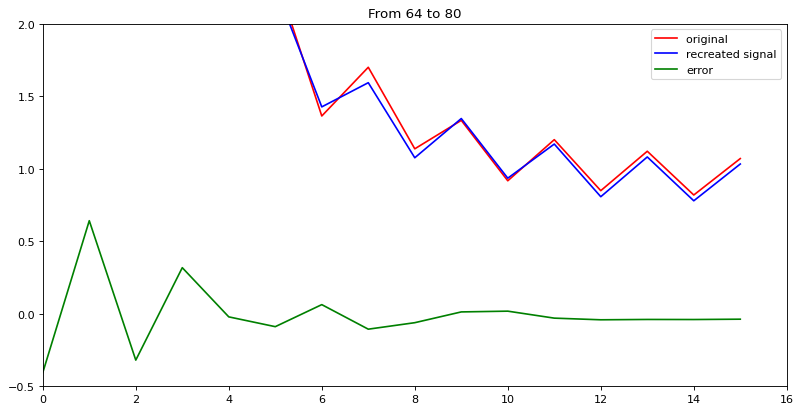

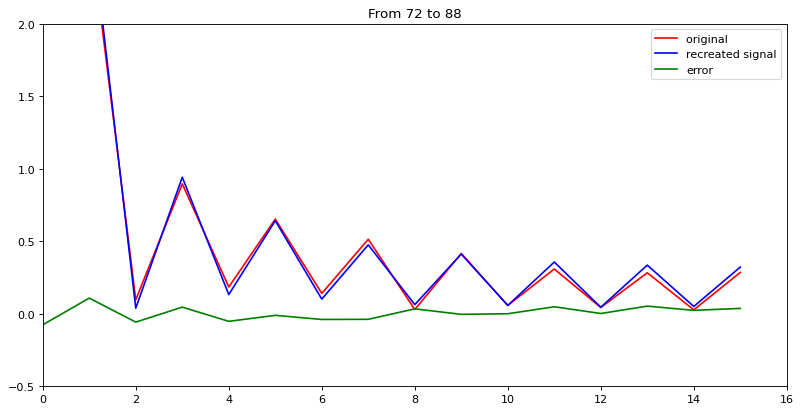

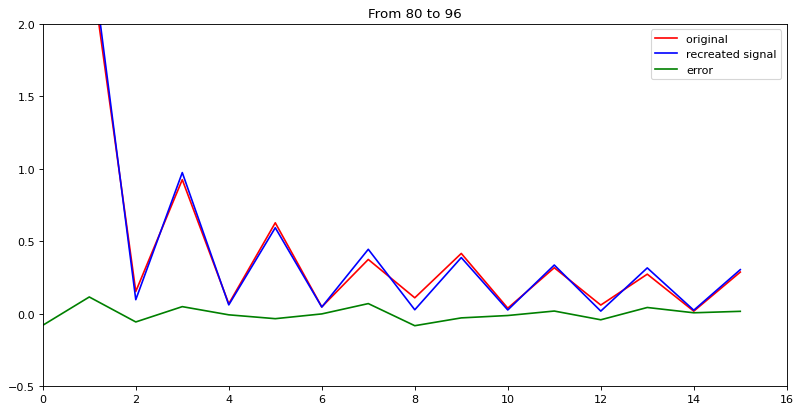

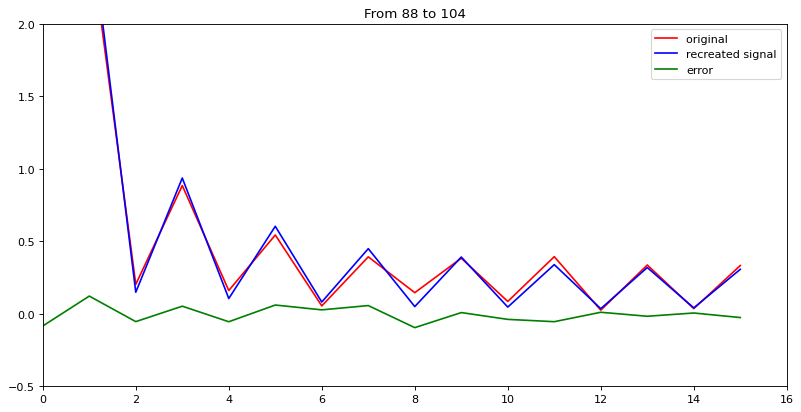

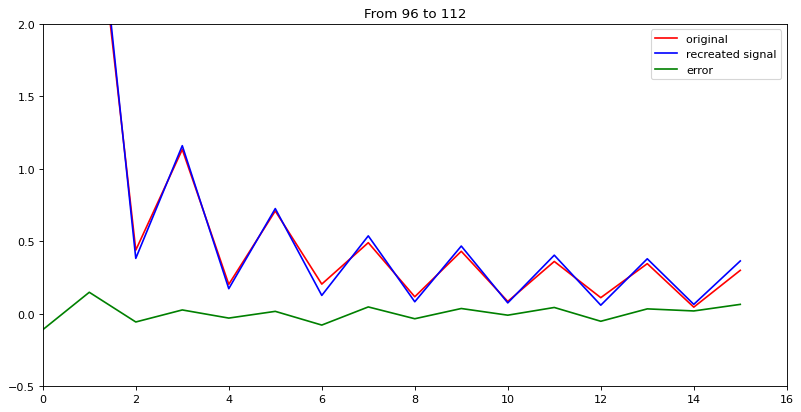

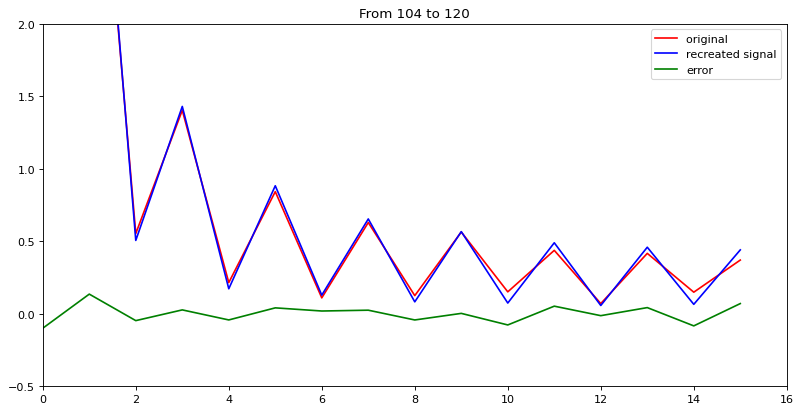

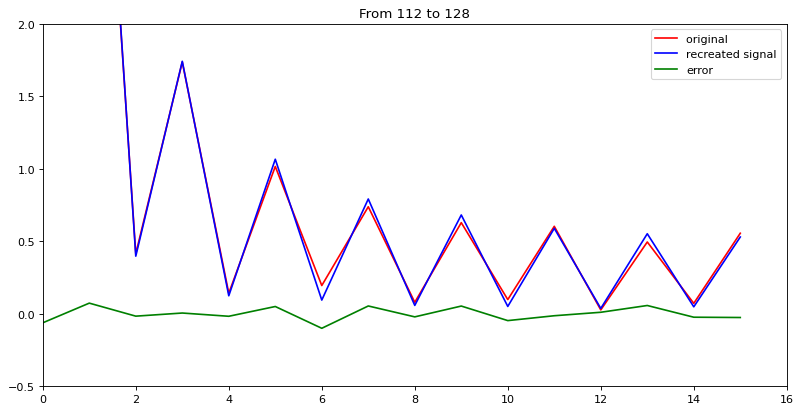

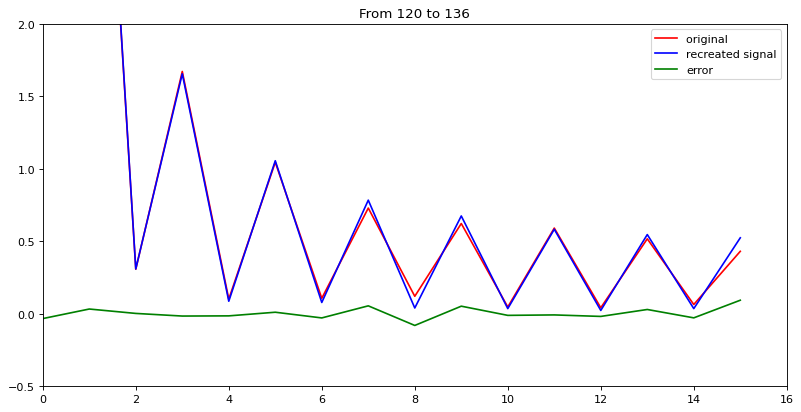

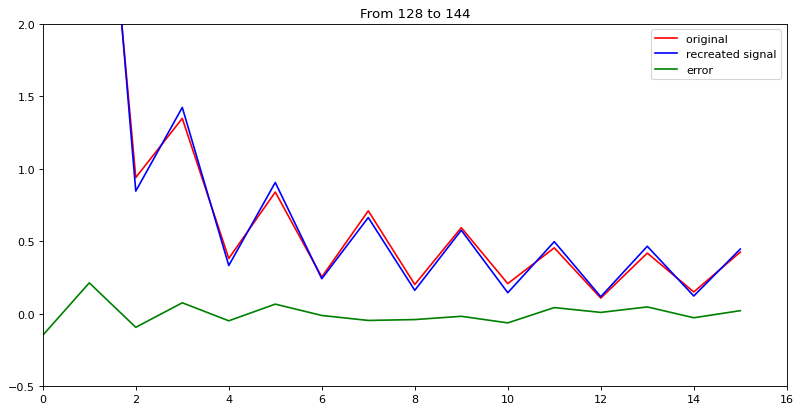

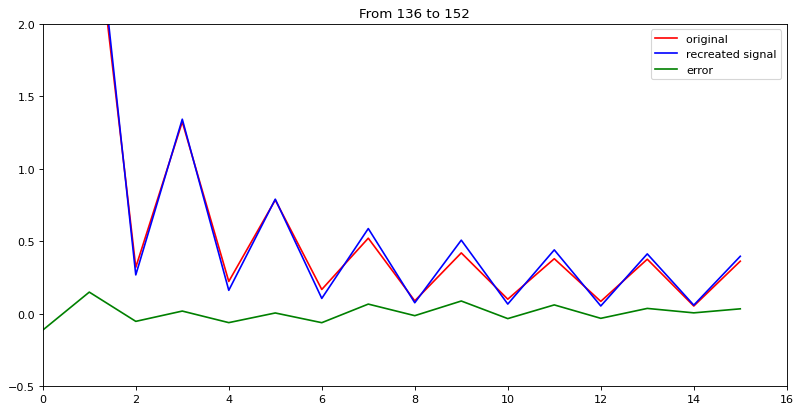

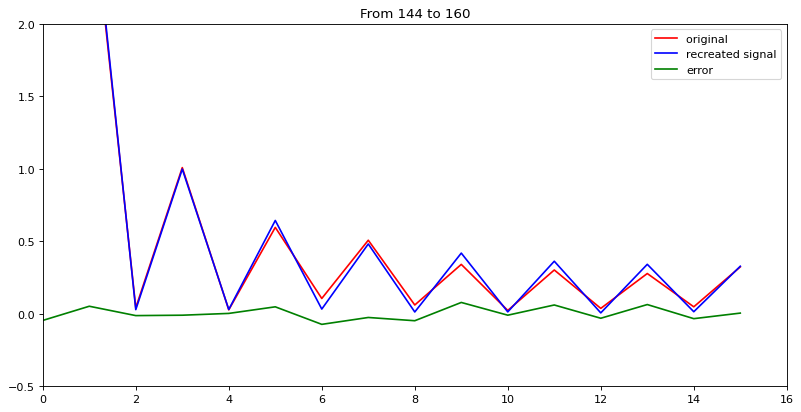

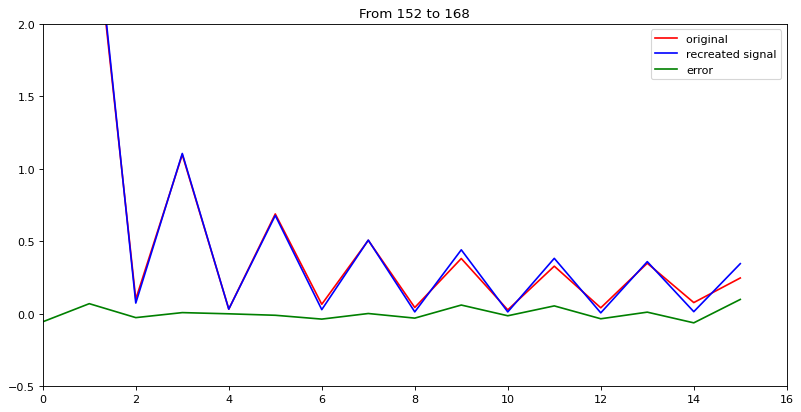

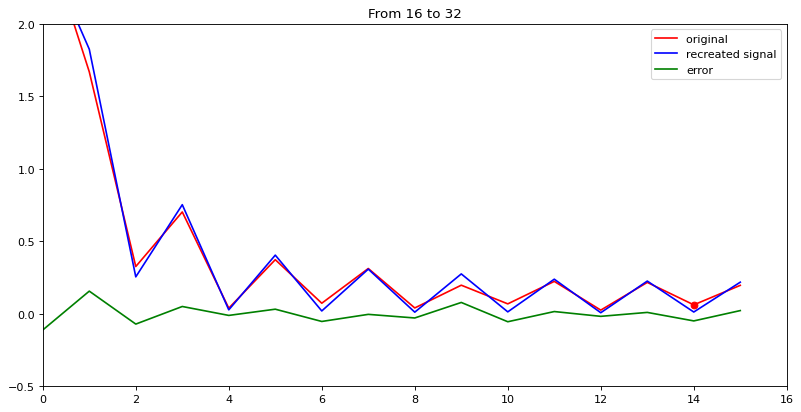

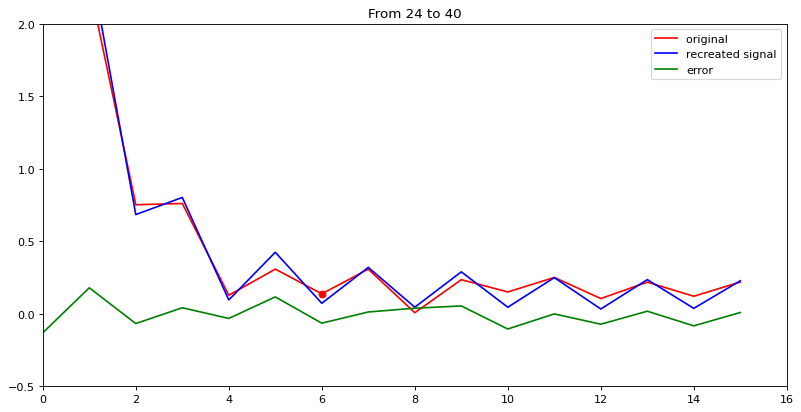

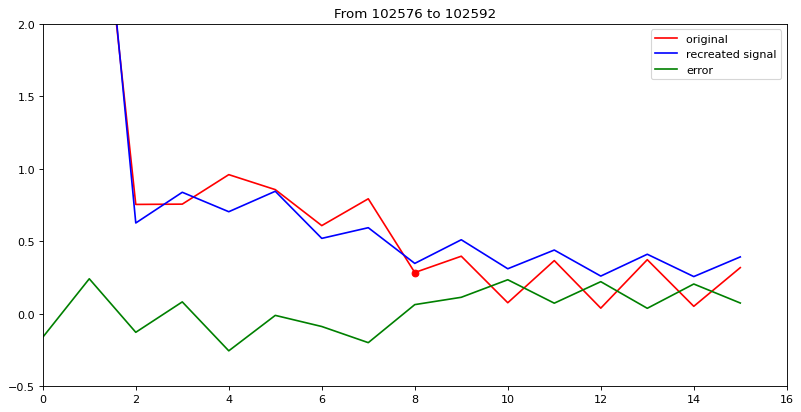

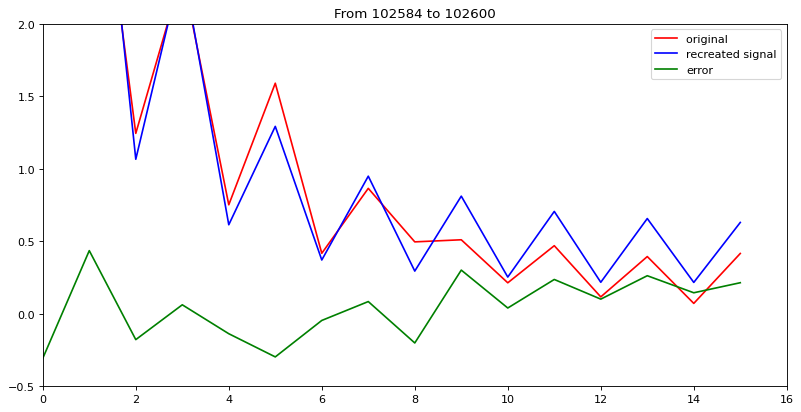

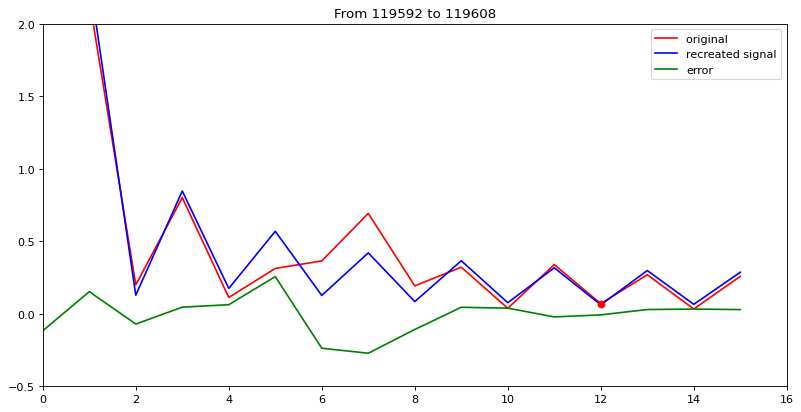

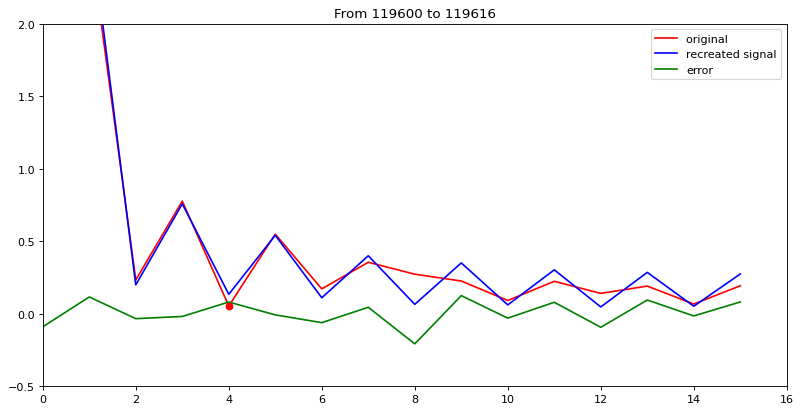

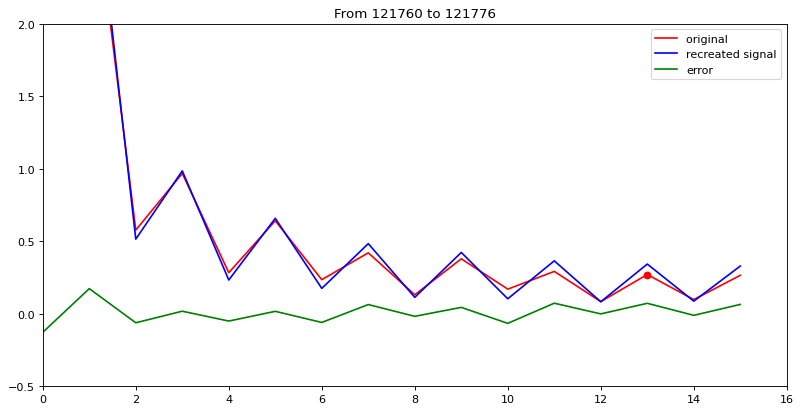

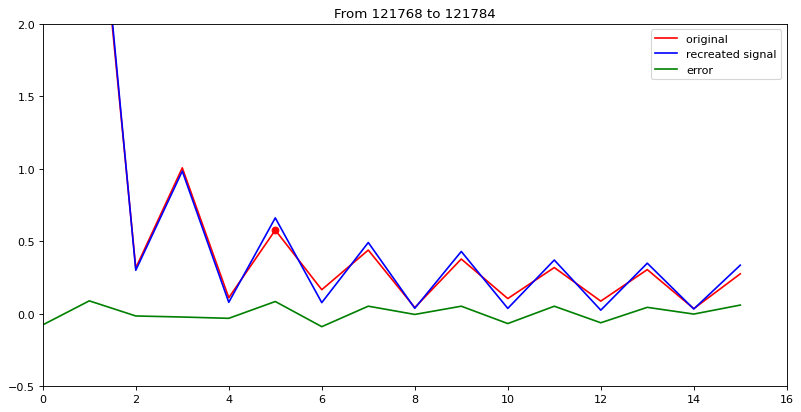

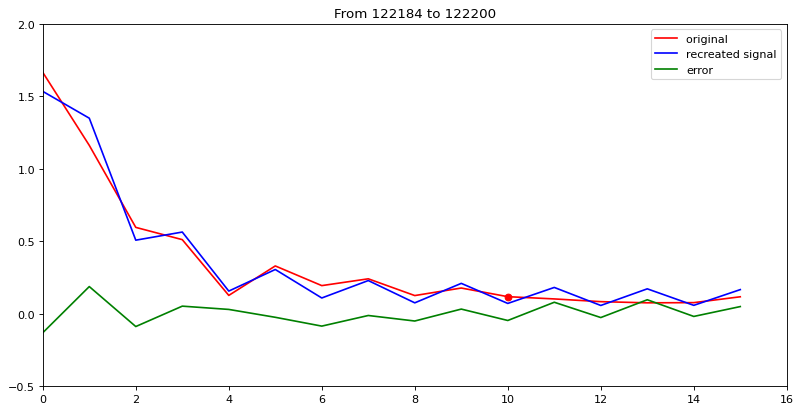

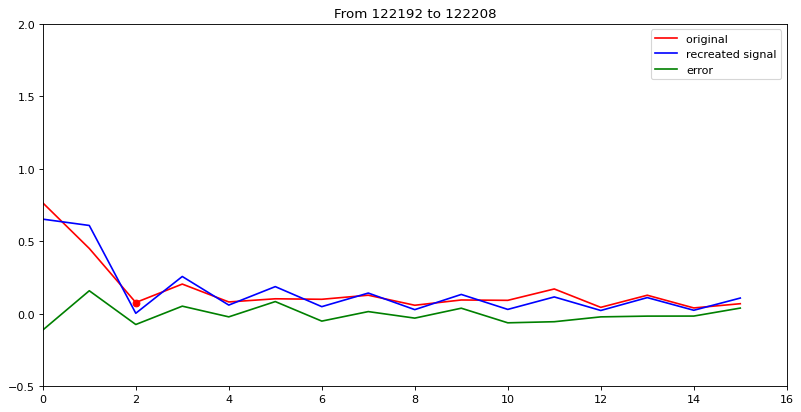

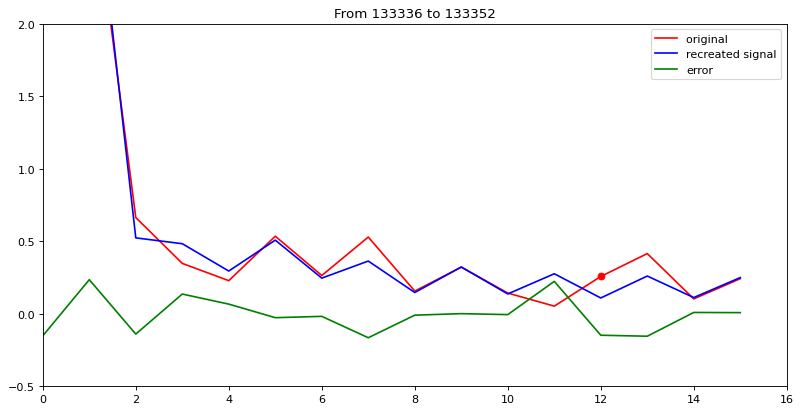

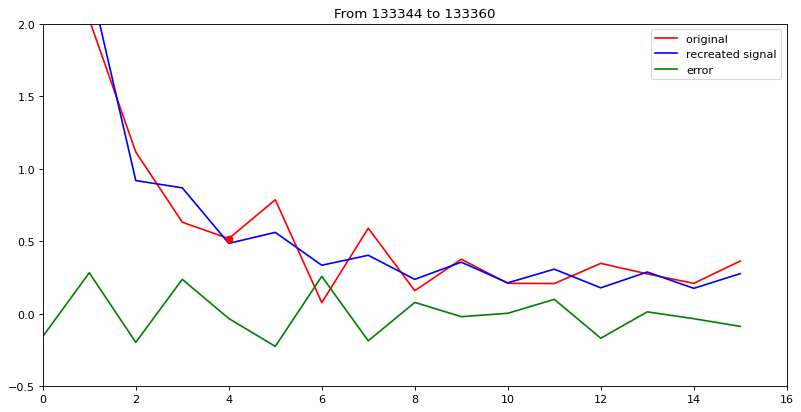

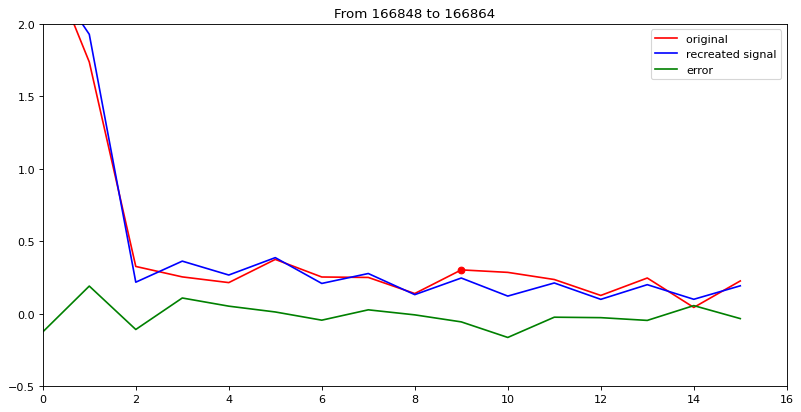

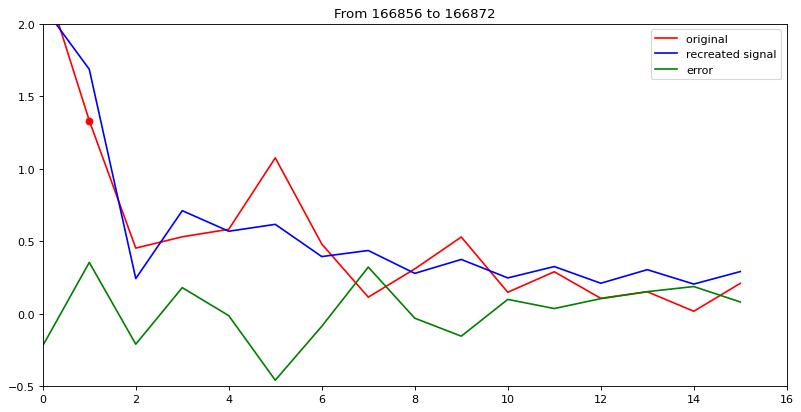

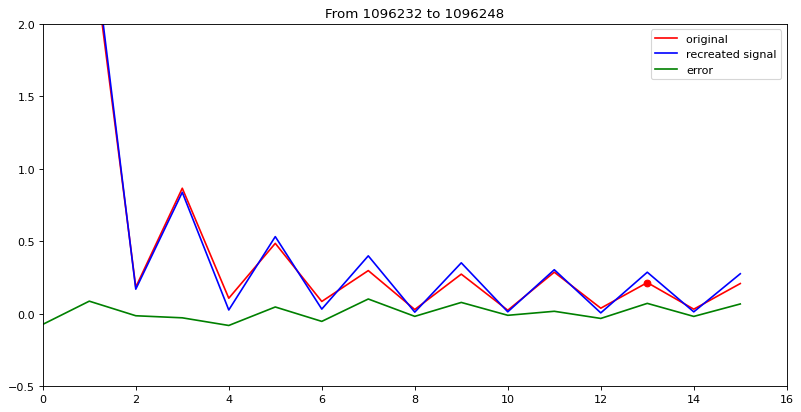

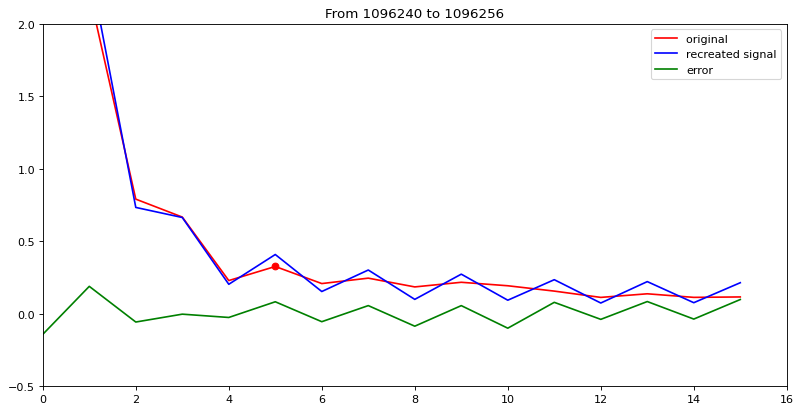

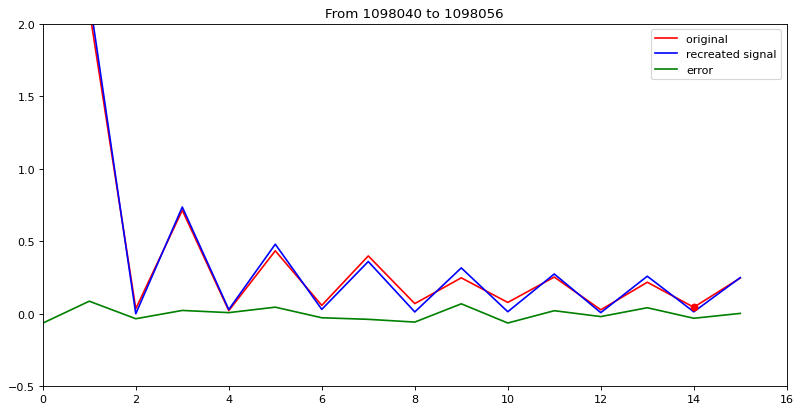

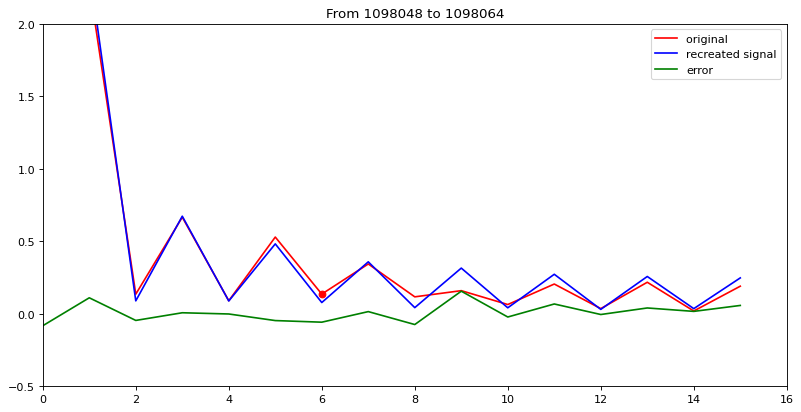

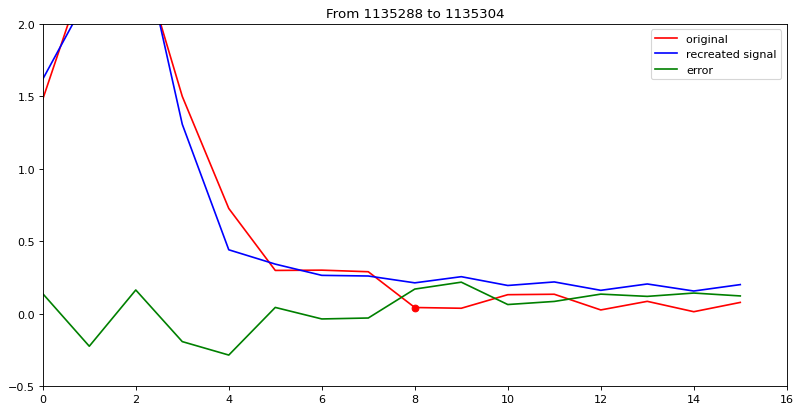

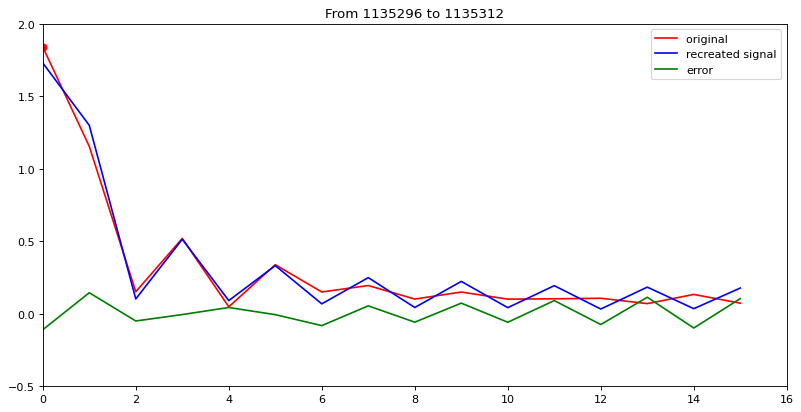

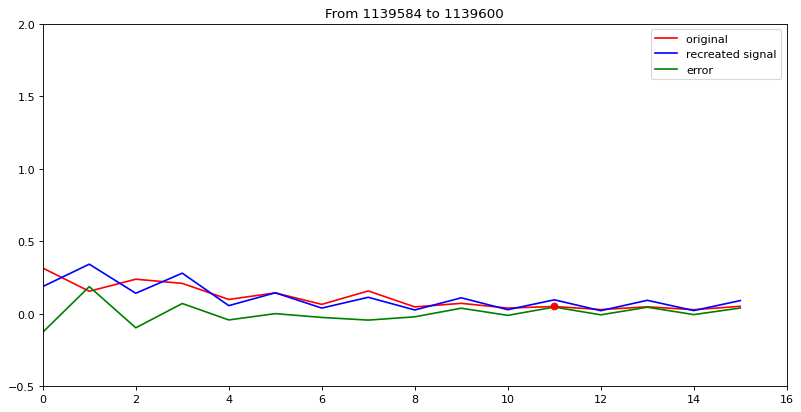

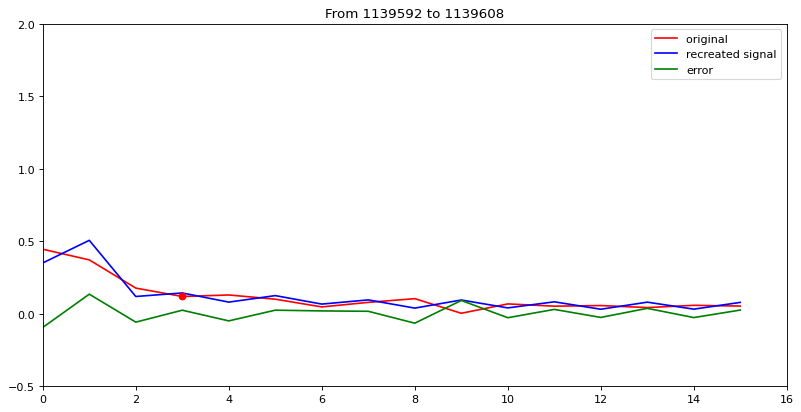

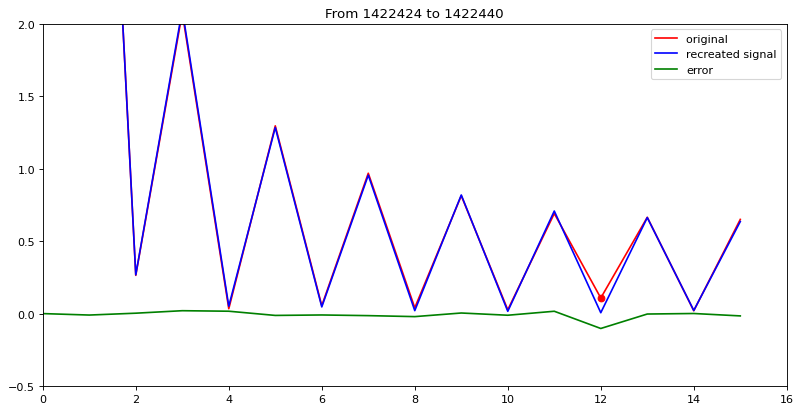

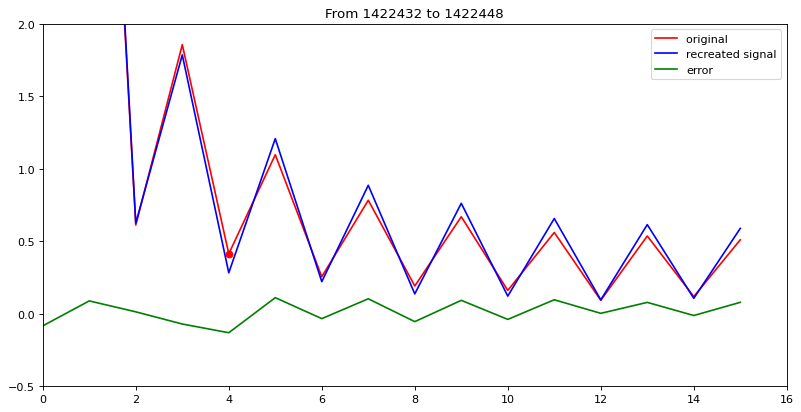

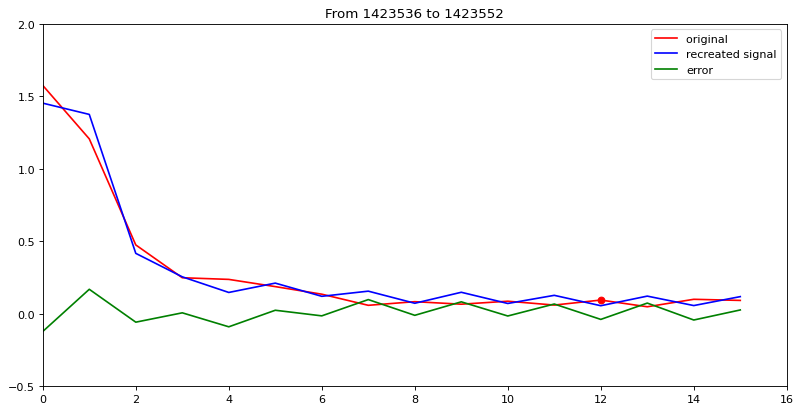

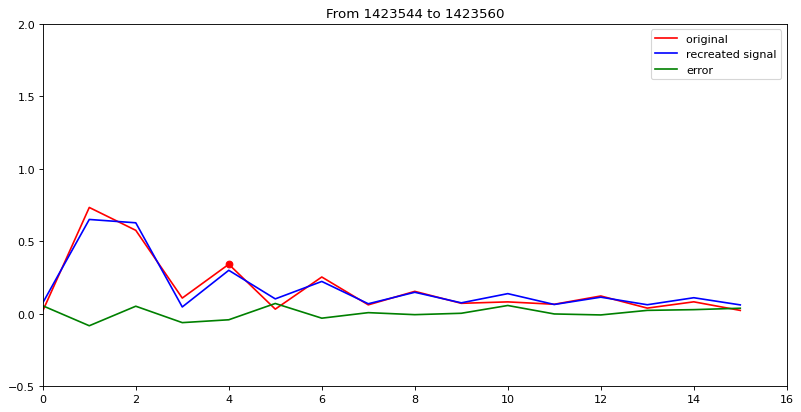

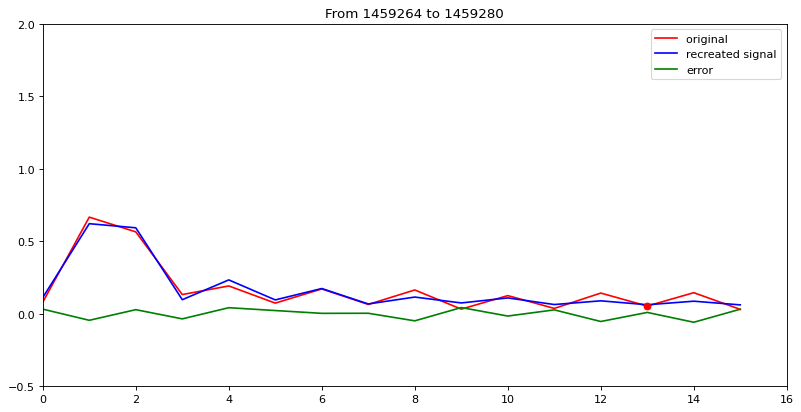

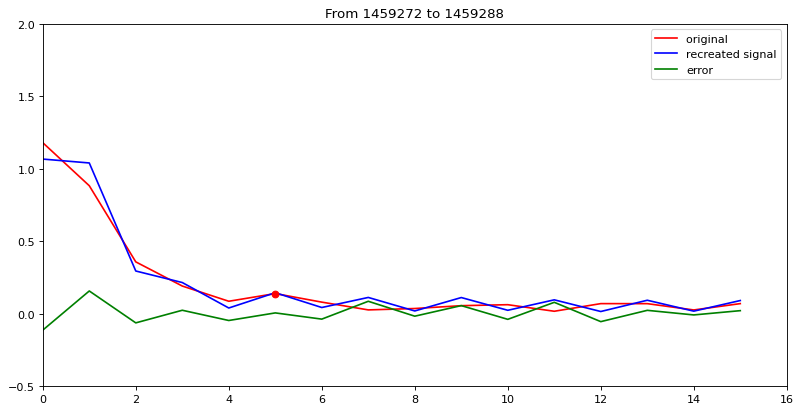

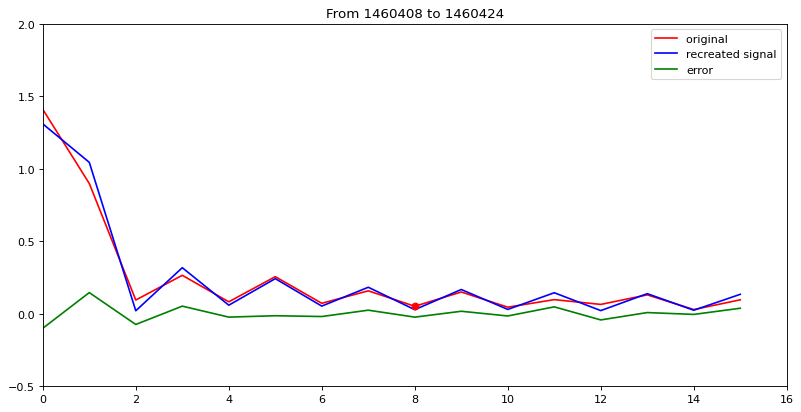

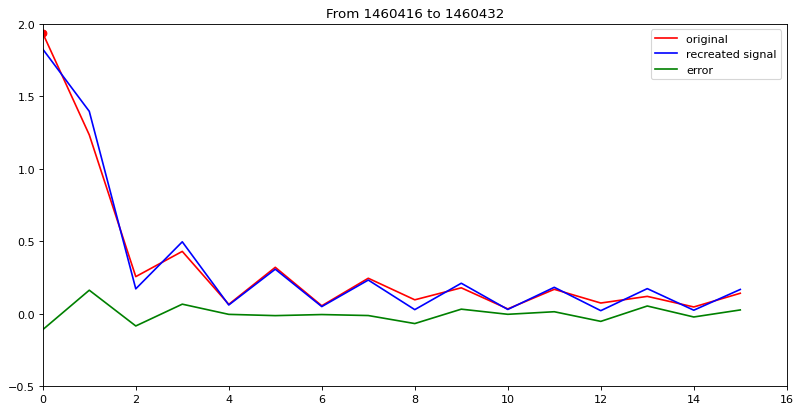

In [50]:
record_number = '04015'
signal_label = "x2"
ProcessRecords(record_number, signal_label)

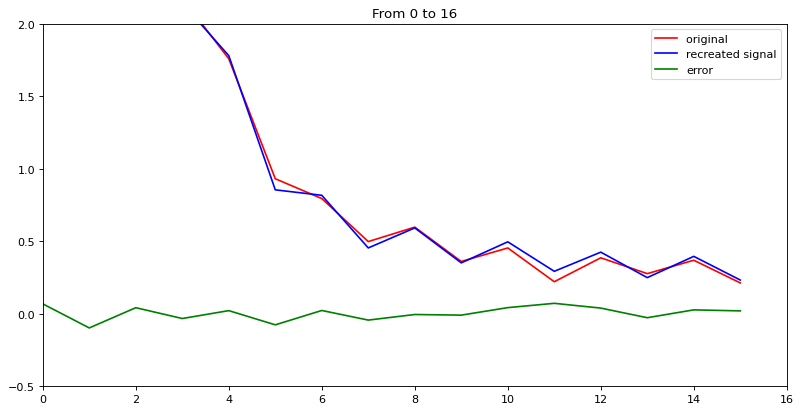

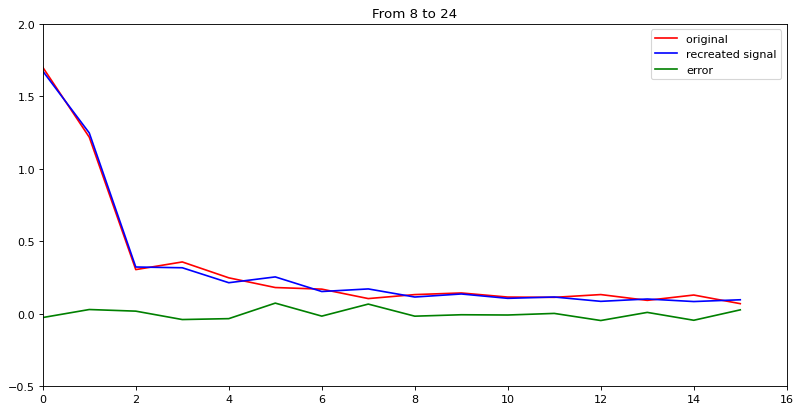

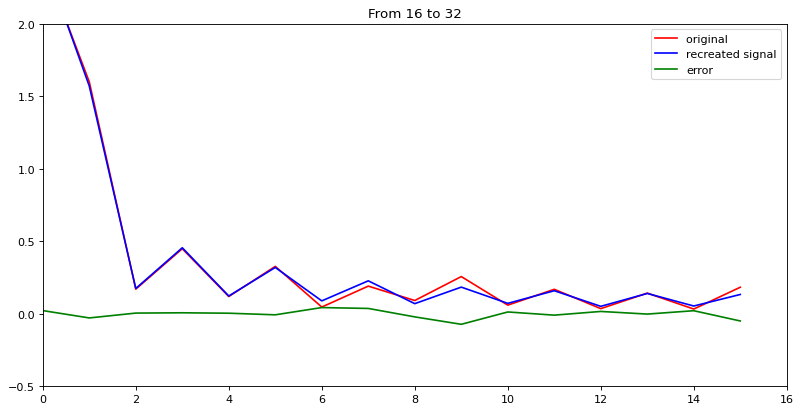

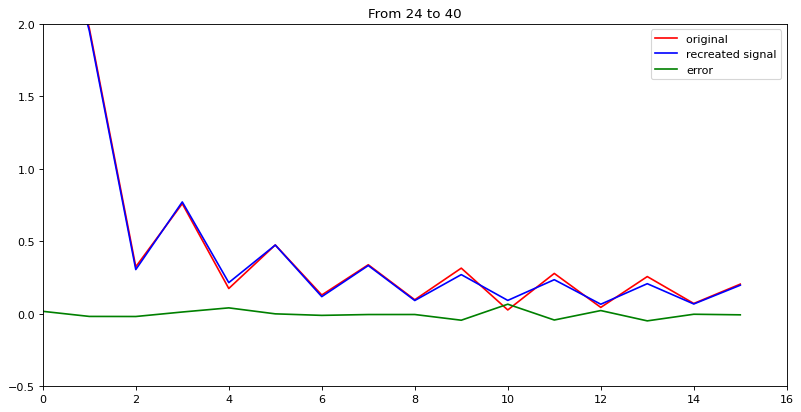

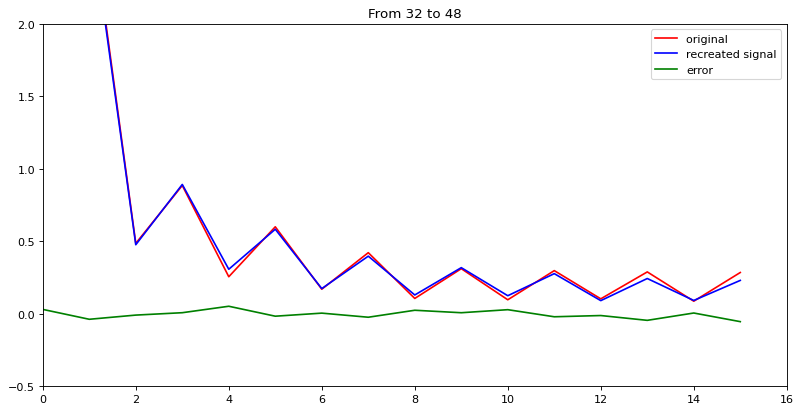

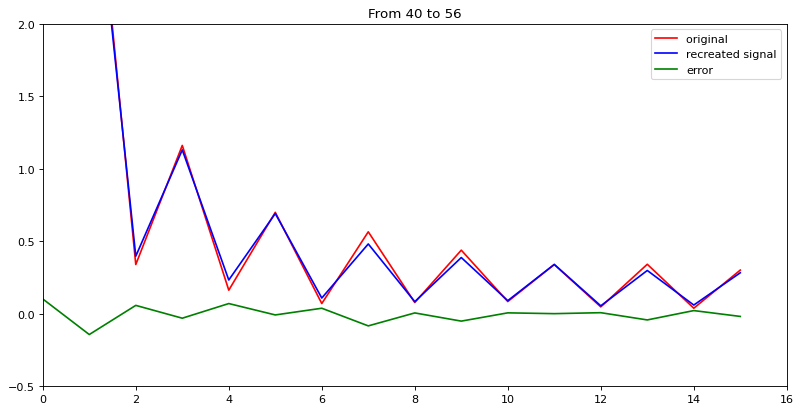

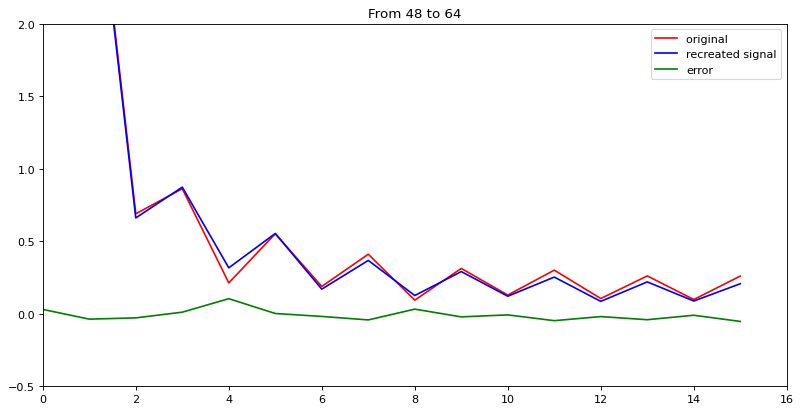

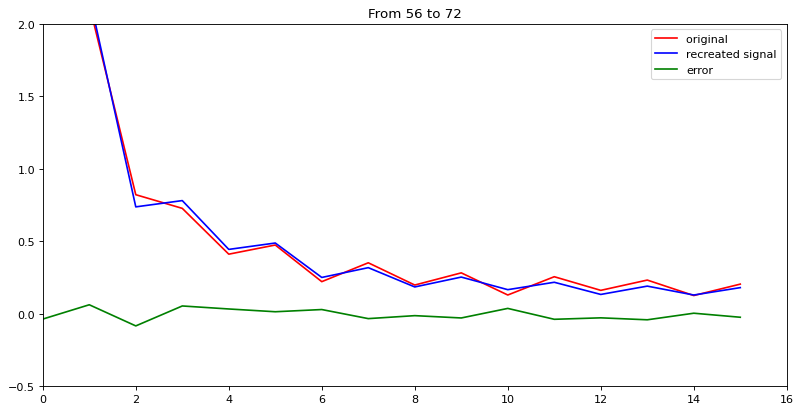

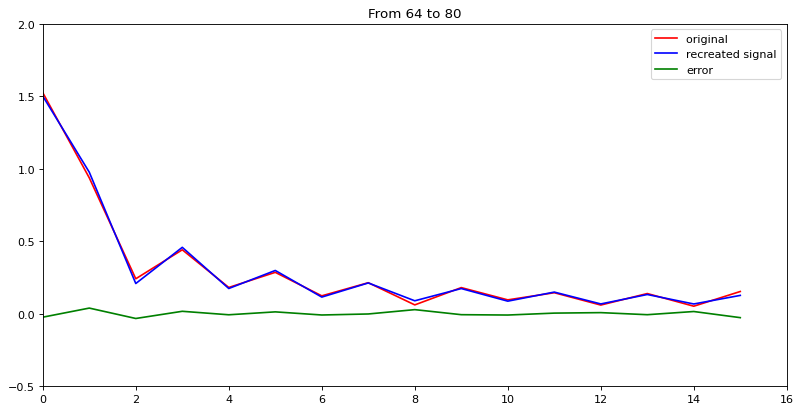

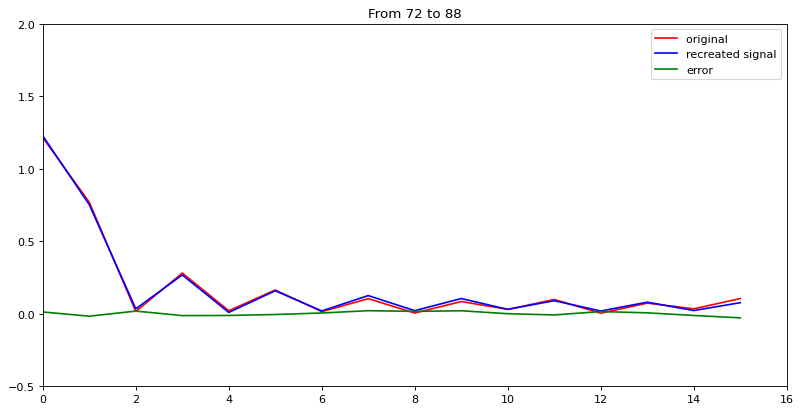

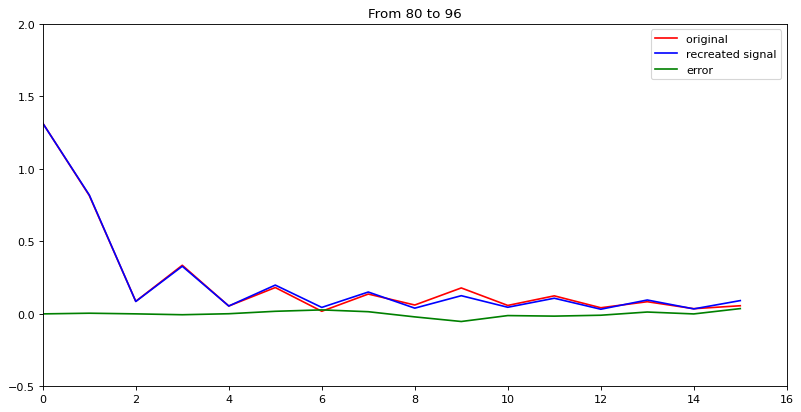

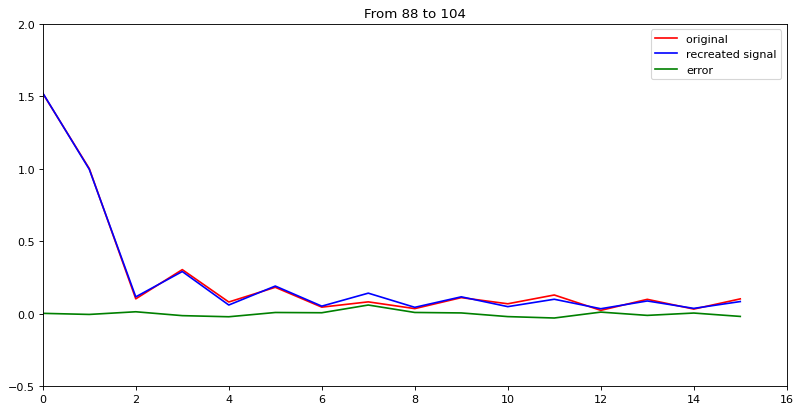

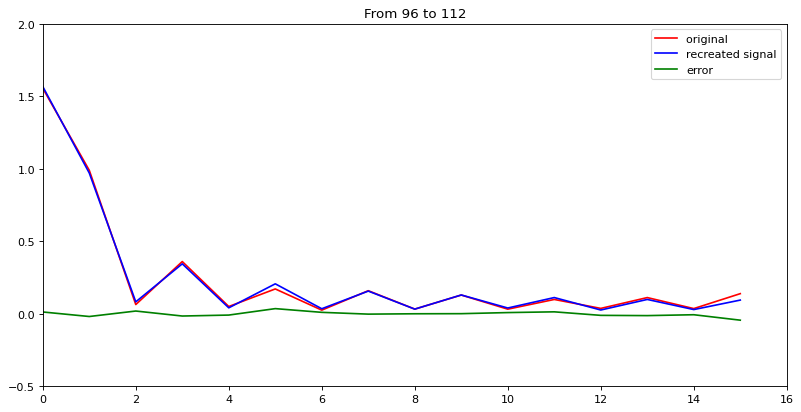

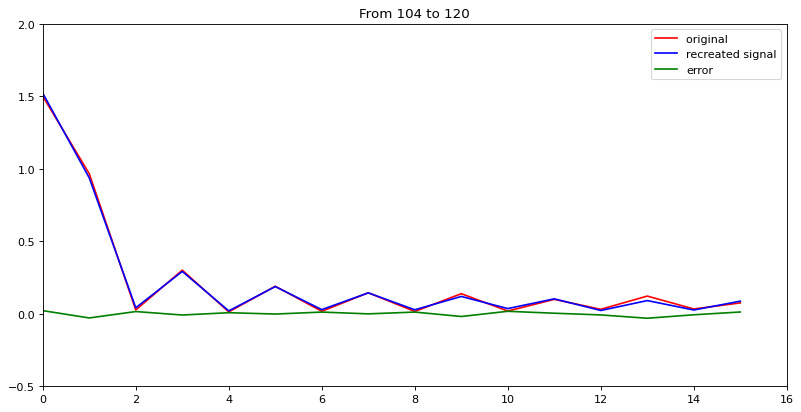

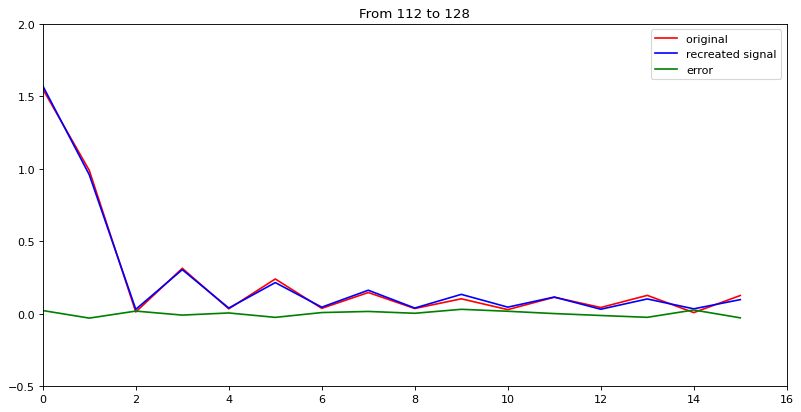

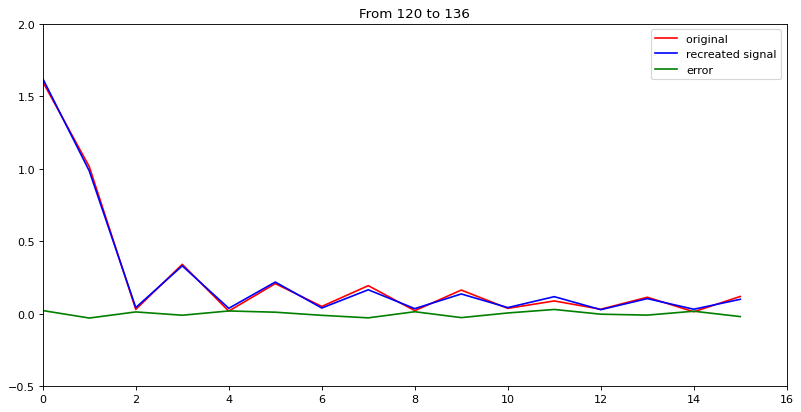

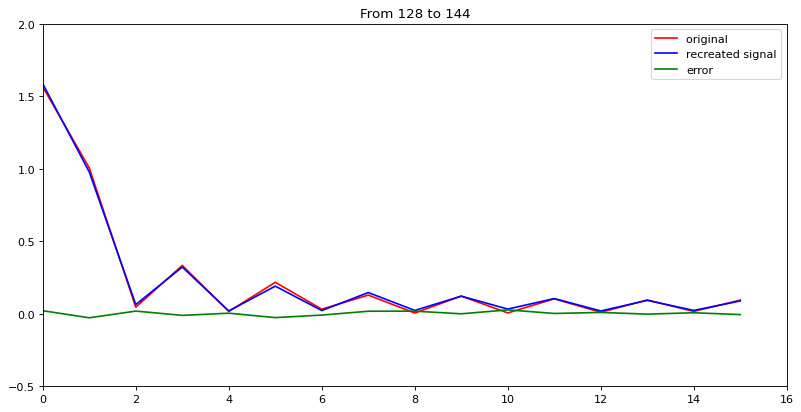

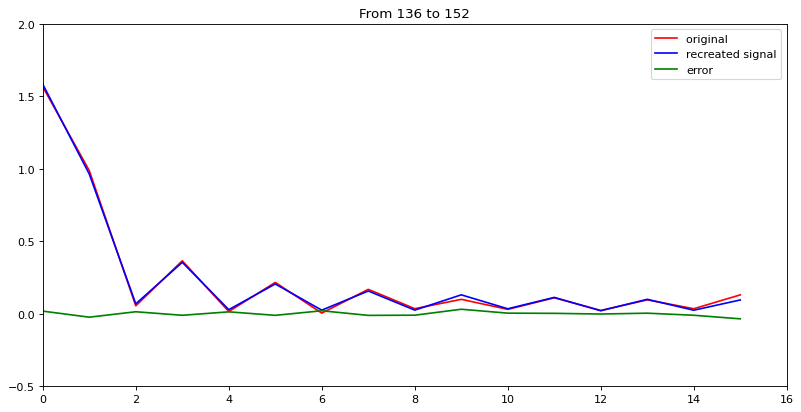

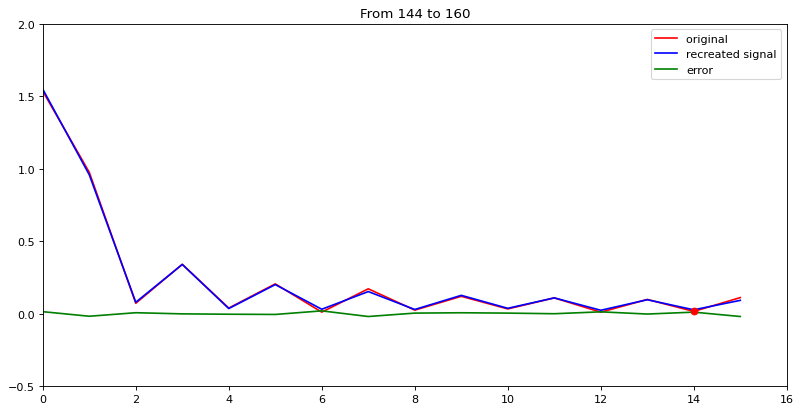

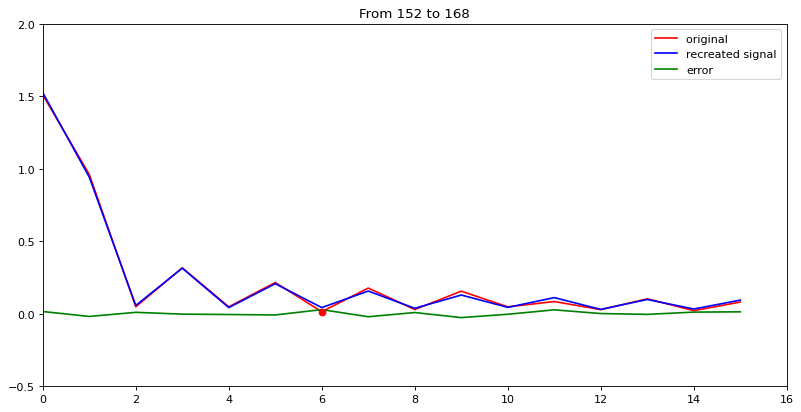

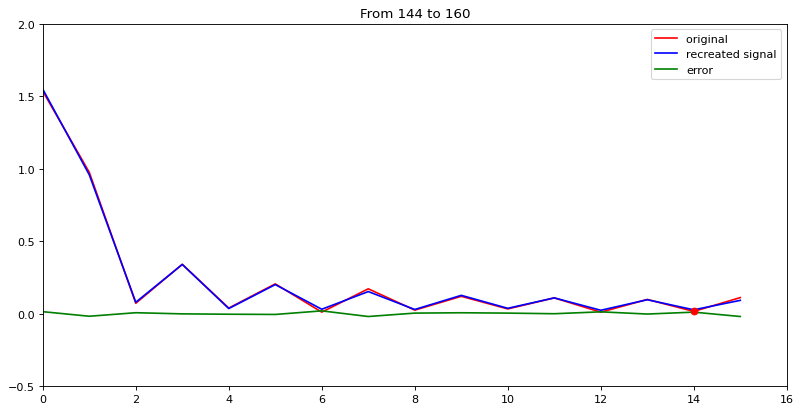

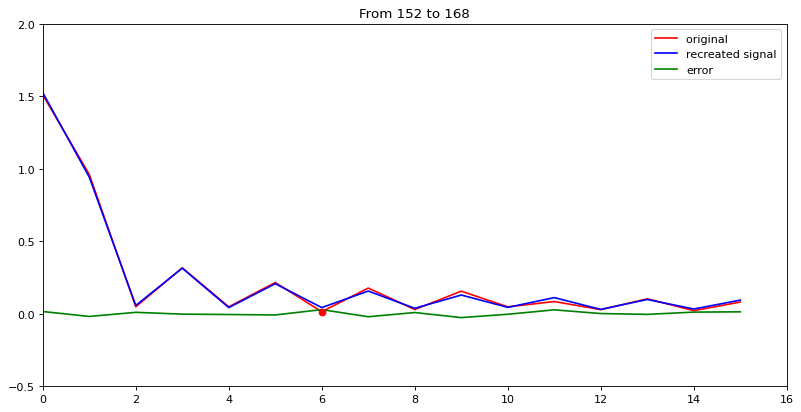

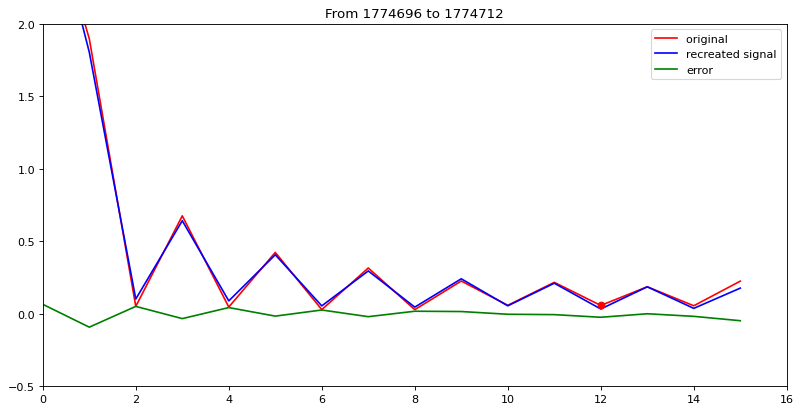

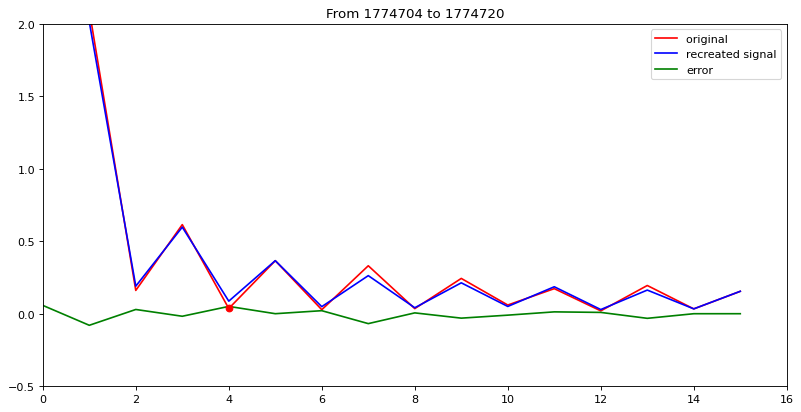

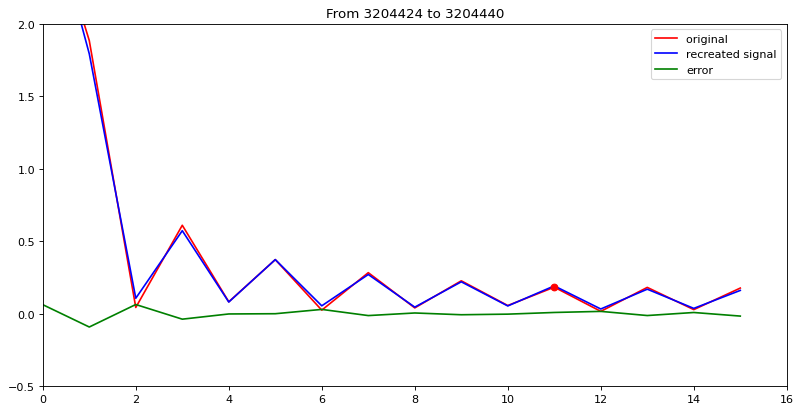

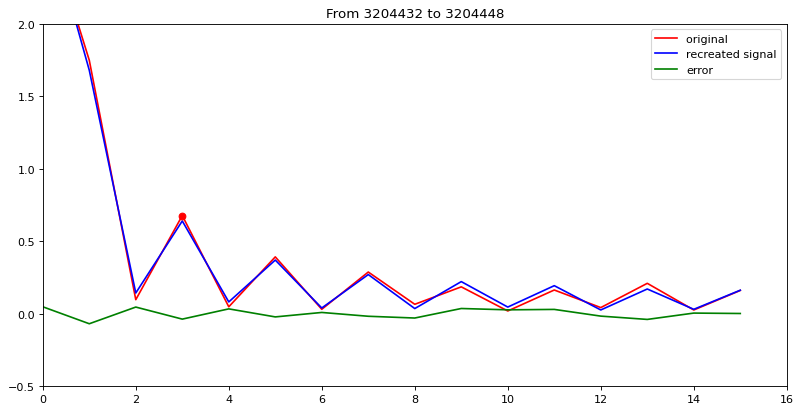

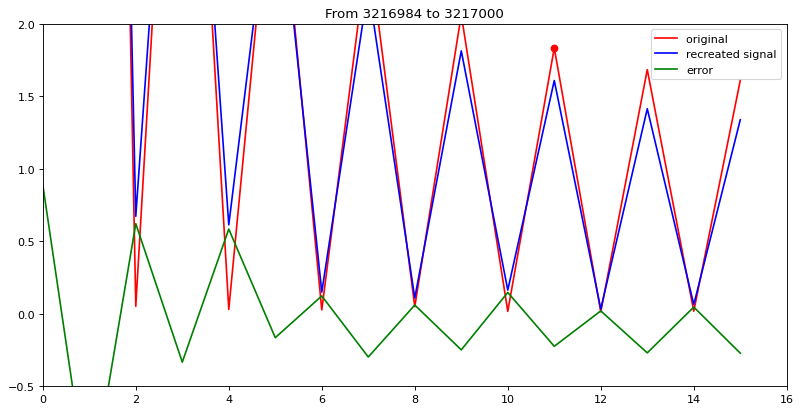

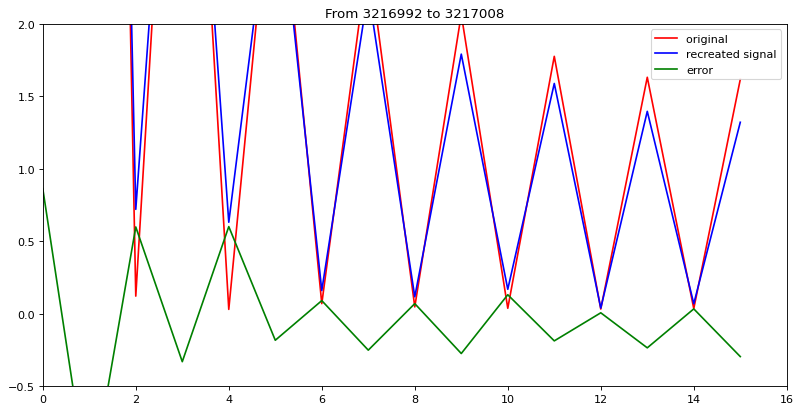

In [51]:
record_number = '08215'
signal_label = "x1"
ProcessRecords(record_number, signal_label)

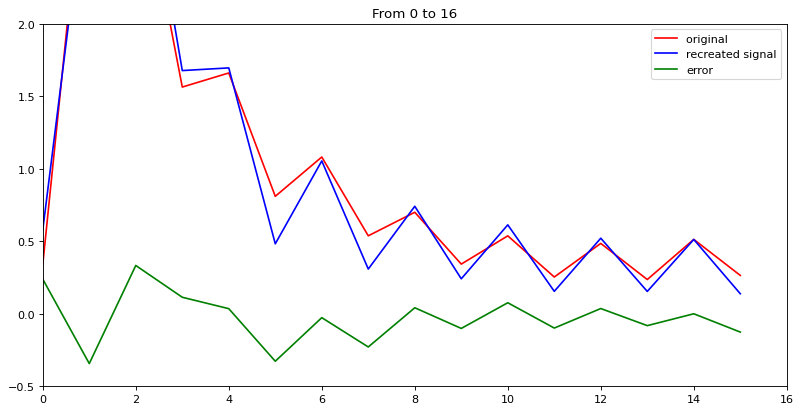

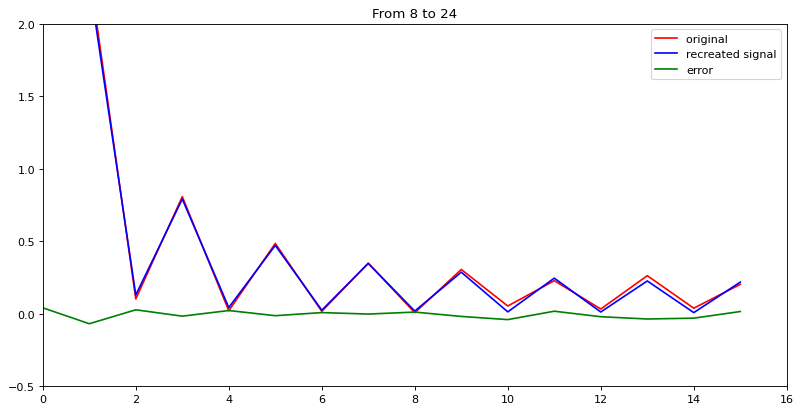

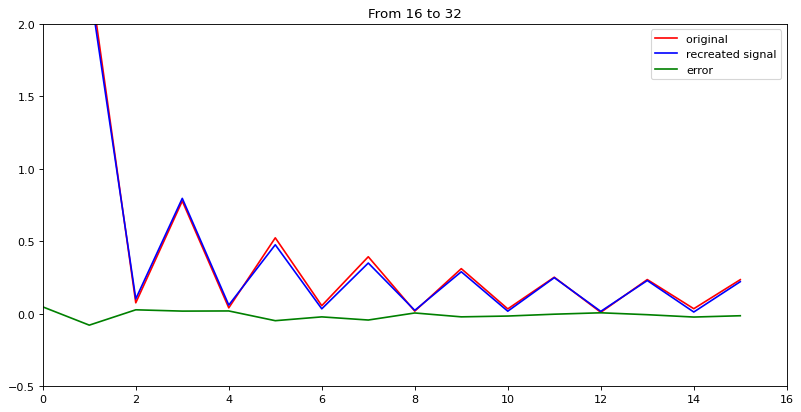

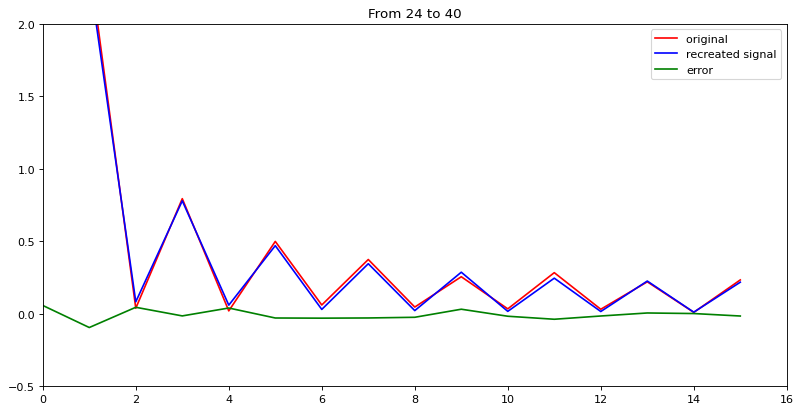

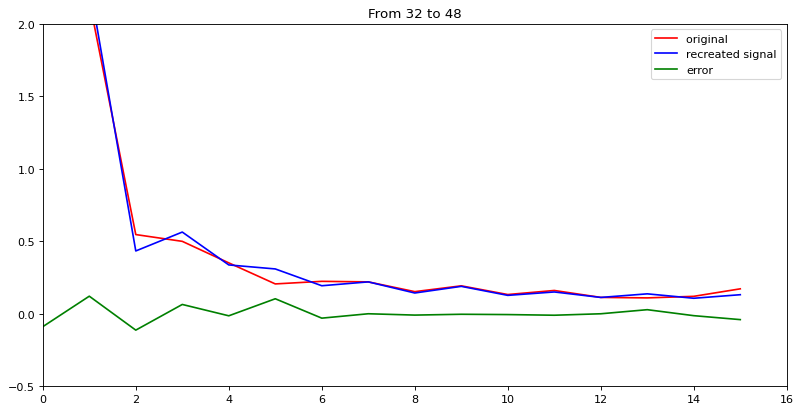

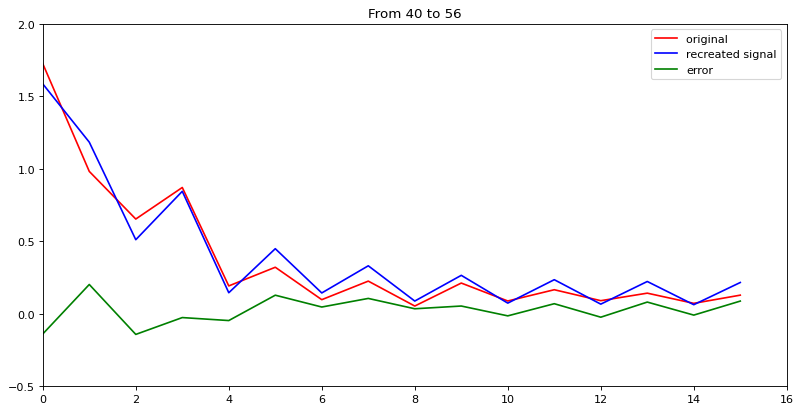

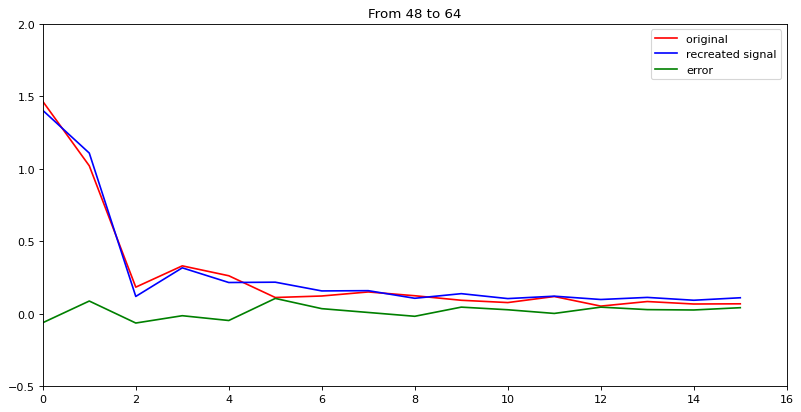

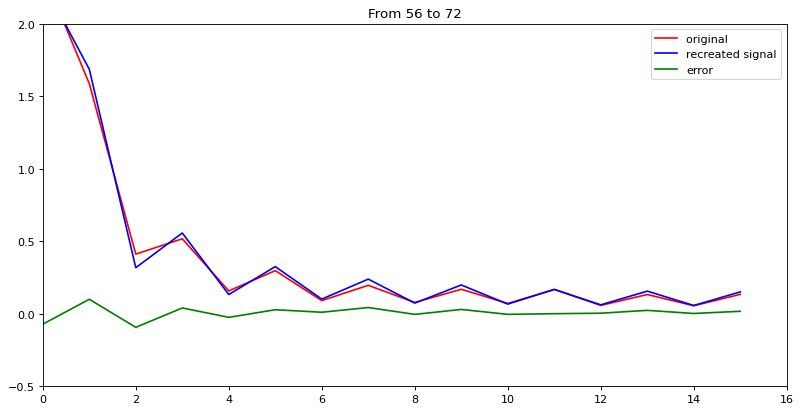

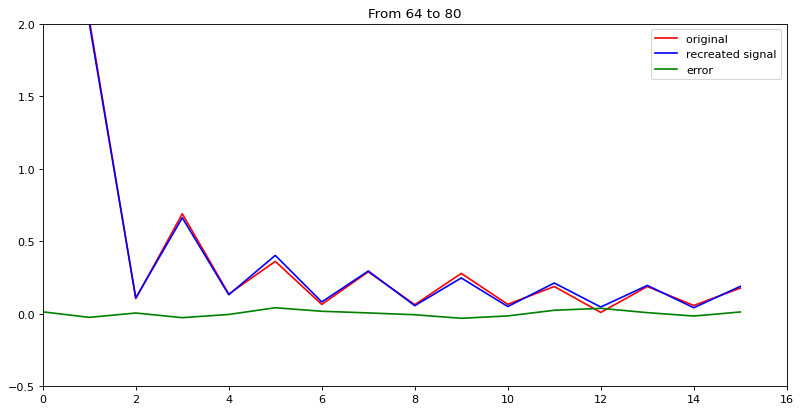

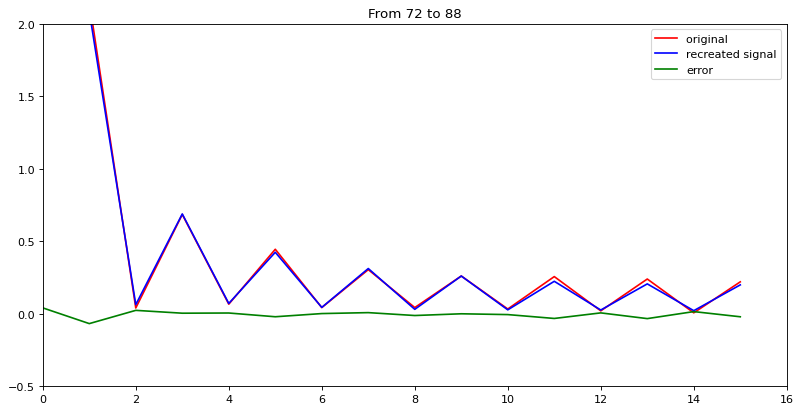

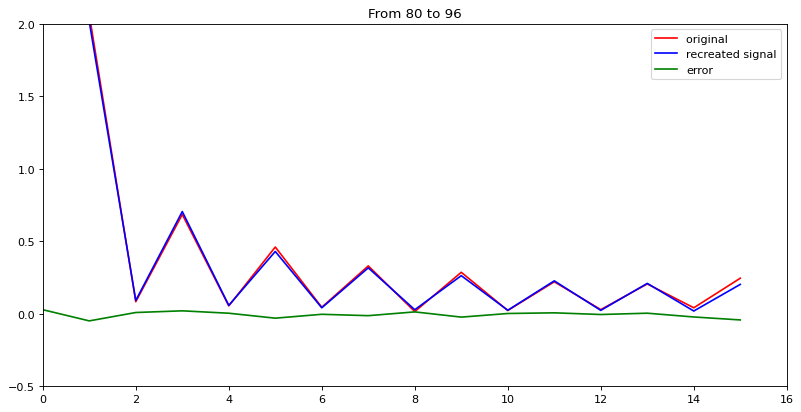

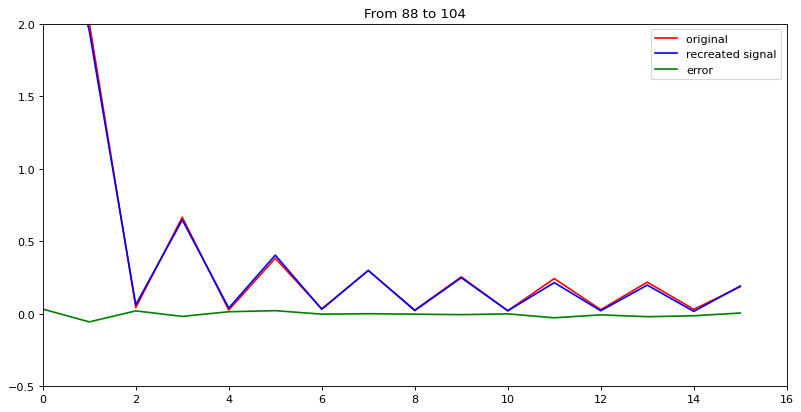

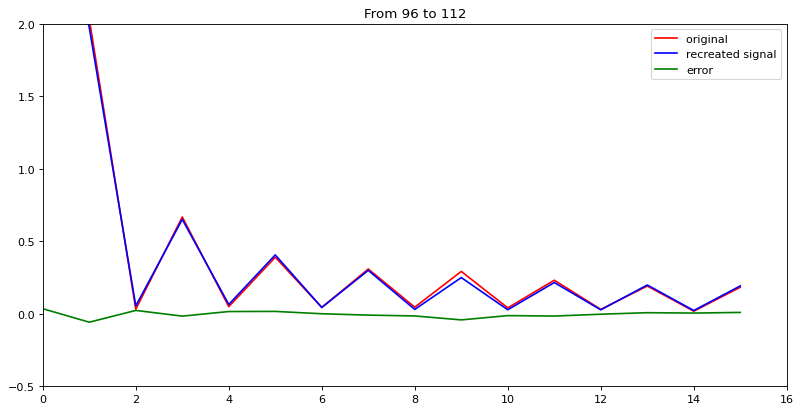

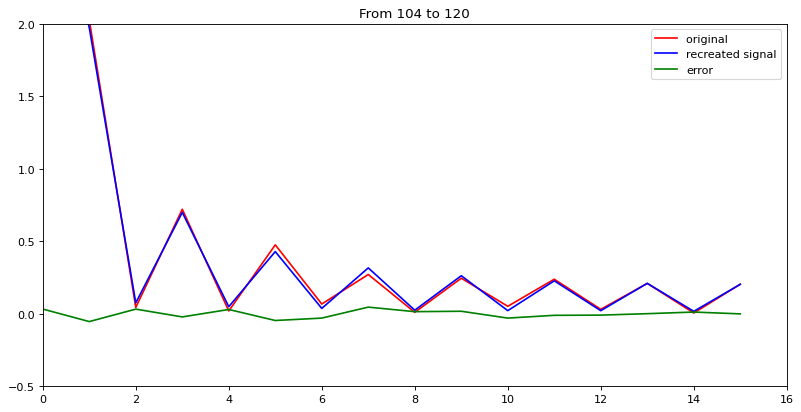

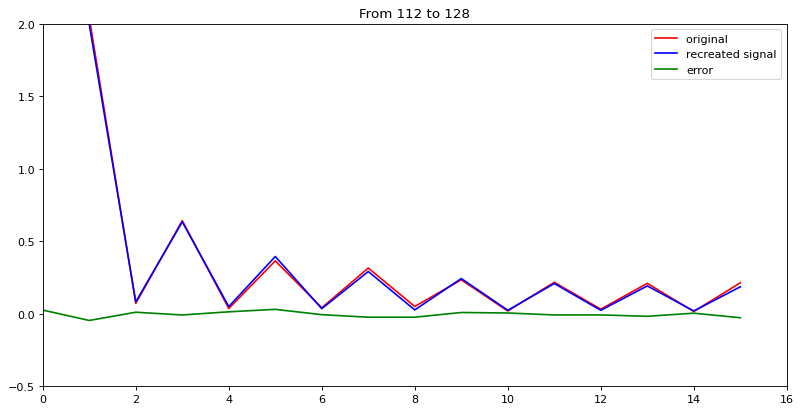

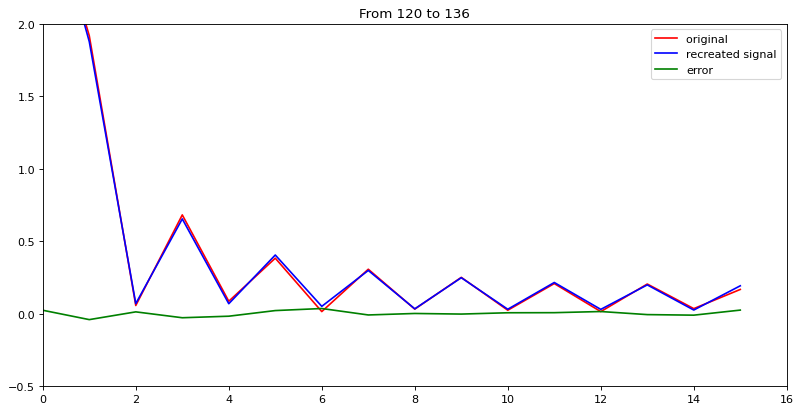

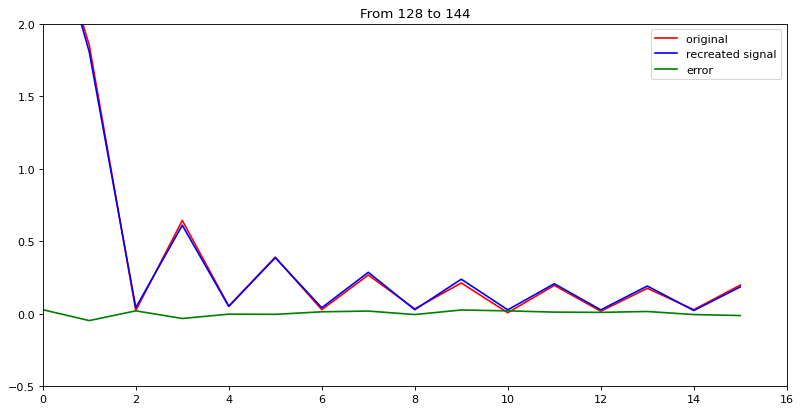

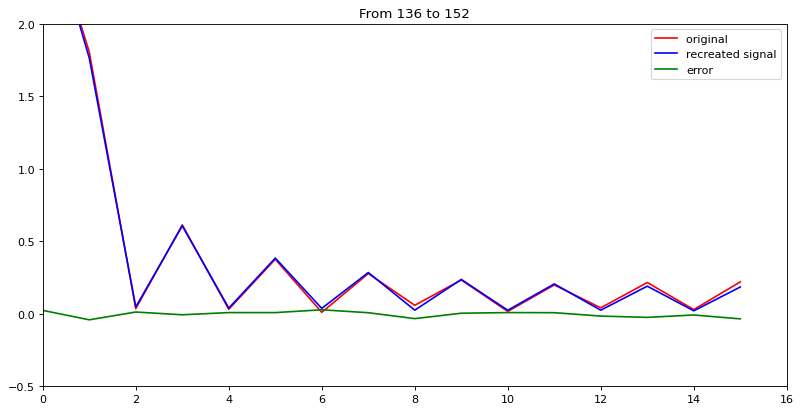

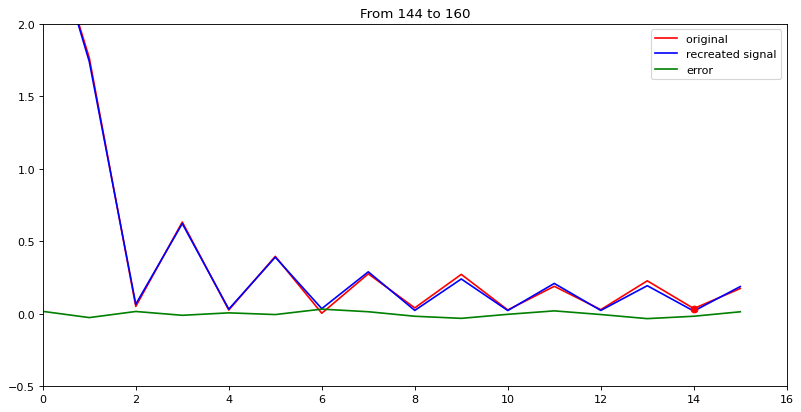

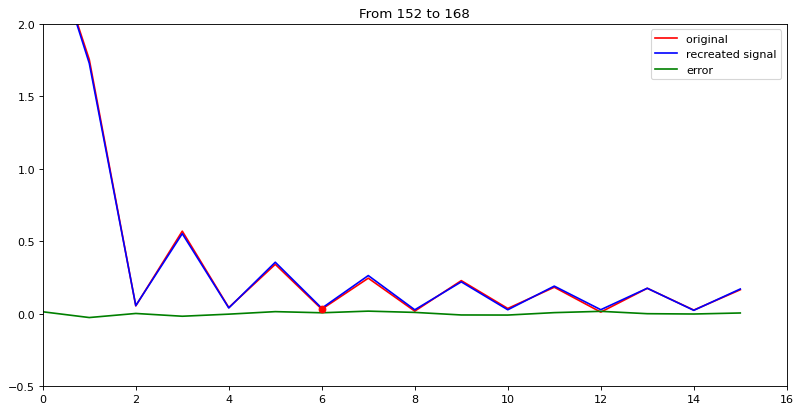

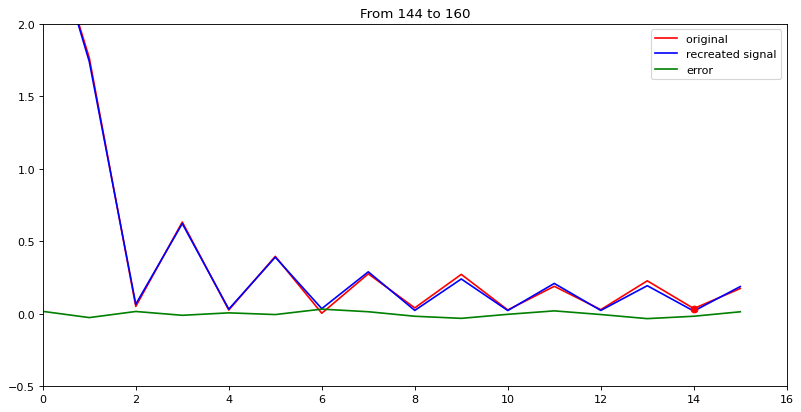

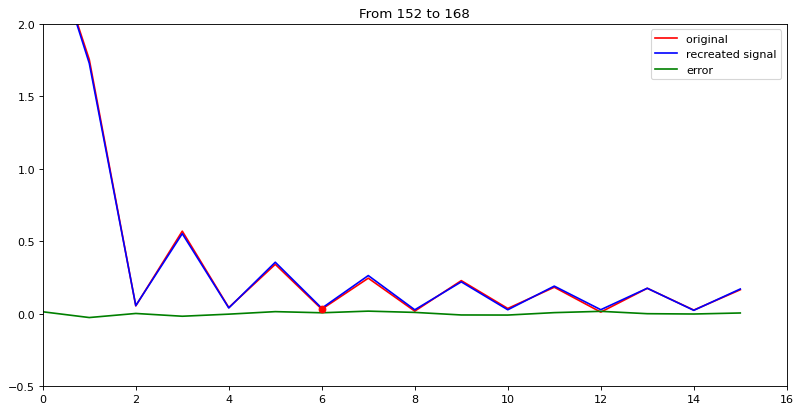

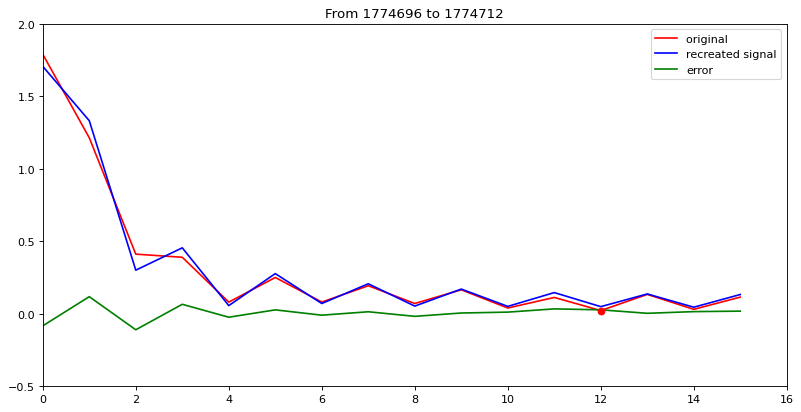

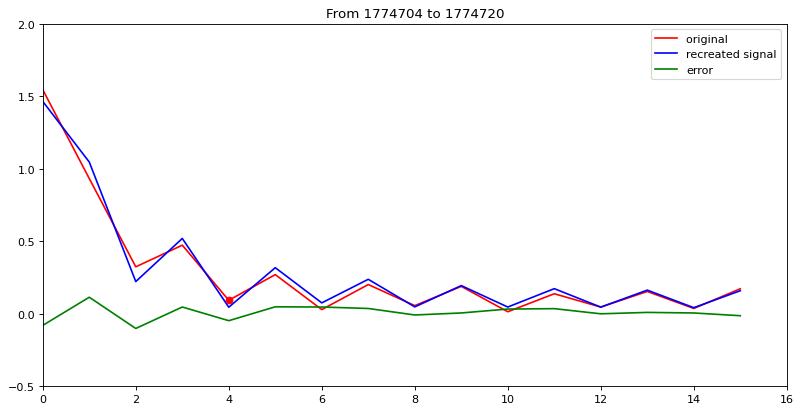

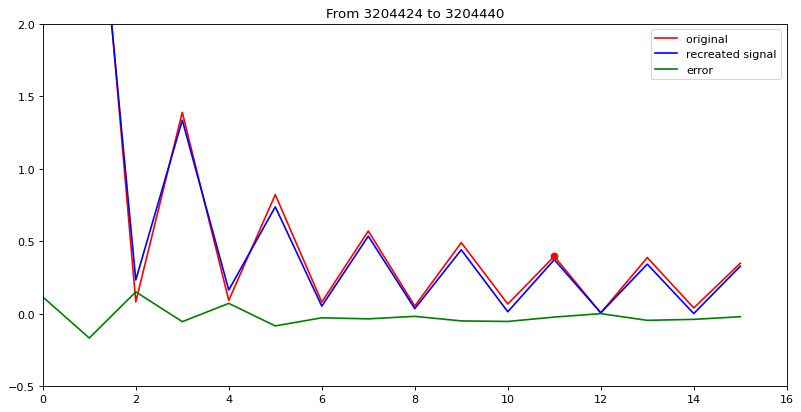

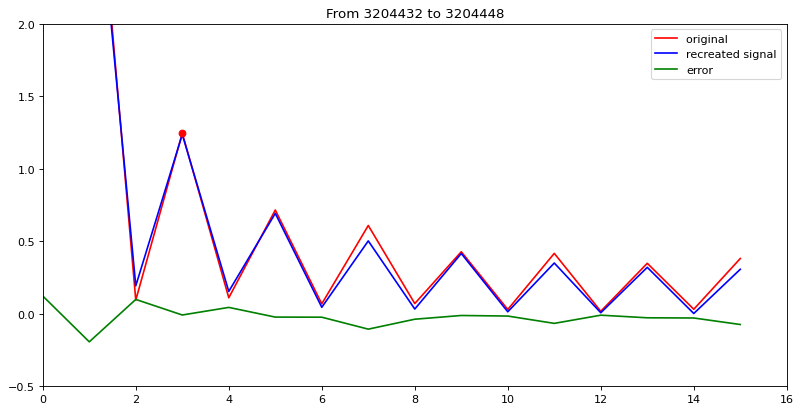

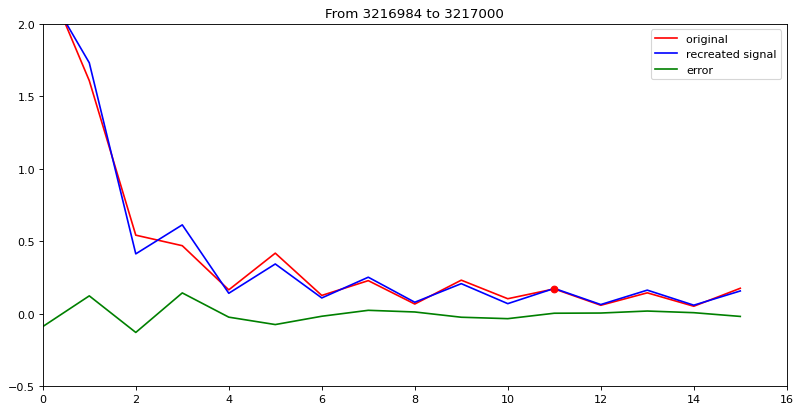

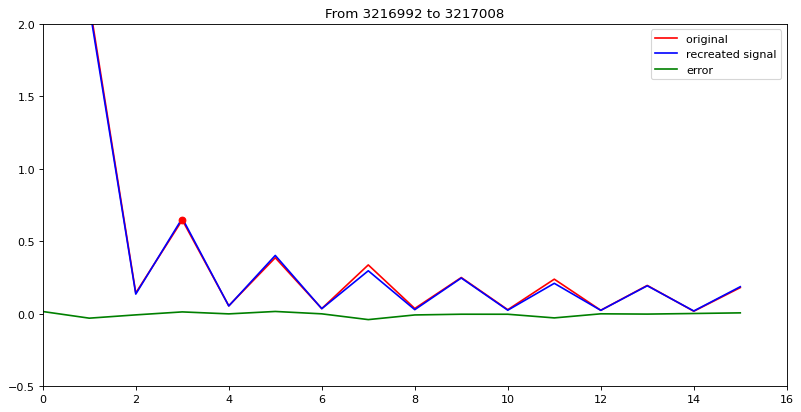

In [52]:
record_number = '08215'
signal_label = "x2"
ProcessRecords(record_number, signal_label)